In [167]:
import os
from IPython.display import display
import pandas as pd
from preprocessing import load_data
import re
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

def presets():
    plt.rc('figure', autolayout = True)

    plt.rc('axes', 
        labelsize = 'large',
        labelweight = 'bold',
        titlesize = 14,
        titleweight = 'bold',
        titlepad = 10       
    )

    %config InlineBackend.figure_format = 'retina'
    pd.options.display.max_rows = 10
    sns.set_style('darkgrid')
    warnings.filterwarnings(action = 'ignore', category = UserWarning)
    return 

presets()

def read_data(filename: str):
    PATH = os.getcwd()

    full_path = os.path.join(PATH, filename)

    if os.path.exists(full_path):
        df = pd.read_csv(full_path)
    else:
        raise FileNotFoundError("The filepath specified was not found. Please try again.")

    return df

def clean_artist_name(name):
    return re.sub(r'[$]', 'S', name)

clean_artist_name = lambda name: re.sub(r'[$]', 'S', name)

# Apply the function to the 'artist_name' column
df['artist_name'] = df['artist_name'].apply(clean_artist_name)

In [27]:
import os
import pandas as pd
from preprocessing import load_data
import re
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings


def presets():
    plt.rc('figure', autolayout = True)

    plt.rc('axes', 
        labelsize = 'large',
        labelweight = 'bold',
        titlesize = 14,
        titleweight = 'bold',
        titlepad = 10       
    )

    %config InlineBackend.figure_format = 'retina'
    pd.options.display.max_rows = 10
    sns.set_style('darkgrid')
    warnings.filterwarnings(action = 'ignore', category = UserWarning)
    return 

presets()



mismatch between cell counter (28) and saved ipython counter (27)
fixing up to actual counter of 27


In [2]:
# df = load_data(file_path='../data/dataset.csv')
PATH = os.getcwd()
df = pd.read_csv(os.path.join(PATH, "data/cleaned_data.csv"))
df.drop(['music_id', 'id_artists'], axis = 1, inplace = True)
df.head()

mismatch between cell counter (4) and saved ipython counter (2)
fixing up to actual counter of 2


user_id  age        education gender      name      country  \
0    83811   16   Undergraduate       F  Danielle       Urban    
1    83811   16   Undergraduate       F  Danielle       Urban    
2    70645   44        Graduate       M    Joshua   Non-Urban    
3    10323   18        Graduate       M   Jeffrey       Urban    
4     7945   60   Middle School       F      Jill       Urban    

                                               music           artist_name  \
0                                       Bank Account             21 Savage   
1  Mo Money Mo Problems (feat. Mase & Puff Daddy)...  The Notorious B.I.G.   
2                                     No New Friends             DJ Khaled   
3                 Love Without Tragedy / Mother Mary               Rihanna   
4                                              Roses      The Chainsmokers   

                                    featured_artists            genre  ...  \
0                                         Birdy, Zoé        Dark Trap  ...   
1                                           LUDMILLA  Underground Rap  ...   
2                                 The xx, LIT killah              Pop  ...   
3  Brett Young, Blueface, Lana Del Rey, Queens of...          Hip-Hop  ...   
4             Jonas Blue, Radiohead, Pearl Jam, ABBA             Rock  ...   

        tempo  time_signature  track_genre  release_date  explicit  duration  \
0  147.482666               5      Unknown    2017-09-23      True      3.67   
1  104.536000               4     hardcore    1997-03-04     False      4.29   
2   89.508358               5      Unknown    2000-01-01      True      5.14   
3  114.657677               4      Unknown    2000-01-01     False      6.98   
4  159.575798               5      Unknown    2000-01-01      True      3.76   

                 music_id                             id_artists  followers  \
0  2fQrGHiQOvpL9UgPvtYy6G  spotify:artist:1URnnhqYAYcrqrcwql10ft     440898   
1  4INDiWSKvqSKDEu7mh8HFz  spotify:artist:5me0Irg2ANcsgc93uaYrpb     849749   
2  5oVlbbiKGdGeZkWCFy0mqk  spotify:artist:0QHgL1lAIqAw0HtD7YldmP     799975   
3  7JpsDefhsnsWn1P6cYfzMr  spotify:artist:5pKCCKE2ajJHZ9KAiaK11H     432071   
4  6O6M7pJLABmfBRoGZMu76Y  spotify:artist:69GGBxA162lTqCwzJG5jLp     695022   

   scaled_ratings  
0        1.979877  
1        4.446776  
2        3.597281  
3        4.344659  
4        4.525902  

[5 rows x 33 columns]

In [3]:
df.info(memory_usage = 'deep')

mismatch between cell counter (4) and saved ipython counter (3)
fixing up to actual counter of 3


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14025 entries, 0 to 14024
Data columns (total 33 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   user_id             14025 non-null  int64  
 1   age                 14025 non-null  int64  
 2   education           14025 non-null  object 
 3   gender              14025 non-null  object 
 4   name                14025 non-null  object 
 5   country             14025 non-null  object 
 6   music               14025 non-null  object 
 7   artist_name         14025 non-null  object 
 8   featured_artists    14025 non-null  object 
 9   genre               14025 non-null  object 
 10  plays               14025 non-null  int64  
 11  artiste_popularity  14025 non-null  float64
 12  audio_popularity    14025 non-null  float64
 13  music_acousticness  14025 non-null  float64
 14  danceability        14025 non-null  float64
 15  energy              14025 non-null  float64
 16  key 

In [4]:
# import re


# def sanitize_artist_names(df, column="artist_name"):
#     # Function to remove special characters and validate artist names
#     def clean_artist_names(artist_names):
#         try:
#             # Use regex to clean artist names
#             cleaned_names = re.sub(r"[^a-zA-Z0-9, ]", "", artist_names)
#             return cleaned_names
#         except Exception as e:
#             print(f"Error cleaning artist names: {e}")
#             return "Unknown"

#     df[column] = df[column].apply(clean_artist_names)
#     return df


# # Apply the sanitize function
# df = sanitize_artist_names(df)

In [4]:
# df.shape
df.describe(include="all")

mismatch between cell counter (5) and saved ipython counter (4)
fixing up to actual counter of 4


user_id           age   education gender     name  country  \
count   14025.000000  14025.000000       14025  14025    14025    14025   
unique           NaN           NaN           4      2      648        2   
top              NaN           NaN   Graduate       F  Michael   Urban    
freq             NaN           NaN        4397   7167      306     7221   
mean    49776.053619     36.447558         NaN    NaN      NaN      NaN   
...              ...           ...         ...    ...      ...      ...   
min        16.000000     13.000000         NaN    NaN      NaN      NaN   
25%     24904.000000     18.000000         NaN    NaN      NaN      NaN   
50%     49511.000000     32.000000         NaN    NaN      NaN      NaN   
75%     74826.000000     53.000000         NaN    NaN      NaN      NaN   
max     99998.000000     80.000000         NaN    NaN      NaN      NaN   

         music artist_name featured_artists       genre  ...         tempo  \
count    14025       14025            14025       14025  ...  14025.000000   
unique    6293         662            12242          37  ...           NaN   
top     Closer       Drake           DaBaby   Classical  ...           NaN   
freq        35         398               11        1107  ...           NaN   
mean       NaN         NaN              NaN         NaN  ...    124.792963   
...        ...         ...              ...         ...  ...           ...   
min        NaN         NaN              NaN         NaN  ...     48.718000   
25%        NaN         NaN              NaN         NaN  ...     90.572846   
50%        NaN         NaN              NaN         NaN  ...    124.191264   
75%        NaN         NaN              NaN         NaN  ...    159.940000   
max        NaN         NaN              NaN         NaN  ...    203.006000   

        time_signature  track_genre  release_date  explicit     duration  \
count     14025.000000        14025         14025     14025  14025.00000   
unique             NaN           58           948         2          NaN   
top                NaN      Unknown    2000-01-01      True          NaN   
freq               NaN        12214          6418      7031          NaN   
mean          3.995651          NaN           NaN       NaN      3.88057   
...                ...          ...           ...       ...          ...   
min           1.000000          NaN           NaN       NaN      0.00000   
25%           3.000000          NaN           NaN       NaN      3.36000   
50%           4.000000          NaN           NaN       NaN      3.75000   
75%           5.000000          NaN           NaN       NaN      4.24000   
max           5.000000          NaN           NaN       NaN     20.08000   

                      music_id                             id_artists  \
count                    14025                                  14025   
unique                    6652                                    665   
top     7BKLCZ1jbUBVqRi2FVlTVw  spotify:artist:3TVXtAsR1Inumwj472S9r4   
freq                        33                                    398   
mean                       NaN                                    NaN   
...                        ...                                    ...   
min                        NaN                                    NaN   
25%                        NaN                                    NaN   
50%                        NaN                                    NaN   
75%                        NaN                                    NaN   
max                        NaN                                    NaN   

            followers  scaled_ratings  
count    14025.000000    14025.000000  
unique            NaN             NaN  
top               NaN             NaN  
freq              NaN             NaN  
mean    500355.727059        2.850730  
...               ...             ...  
min       1061.000000        1.000000  
25%     249503.000000        1.000000  
50%     500787.000000    

In [5]:
#check for any missing values
df.isnull().any().any()

False

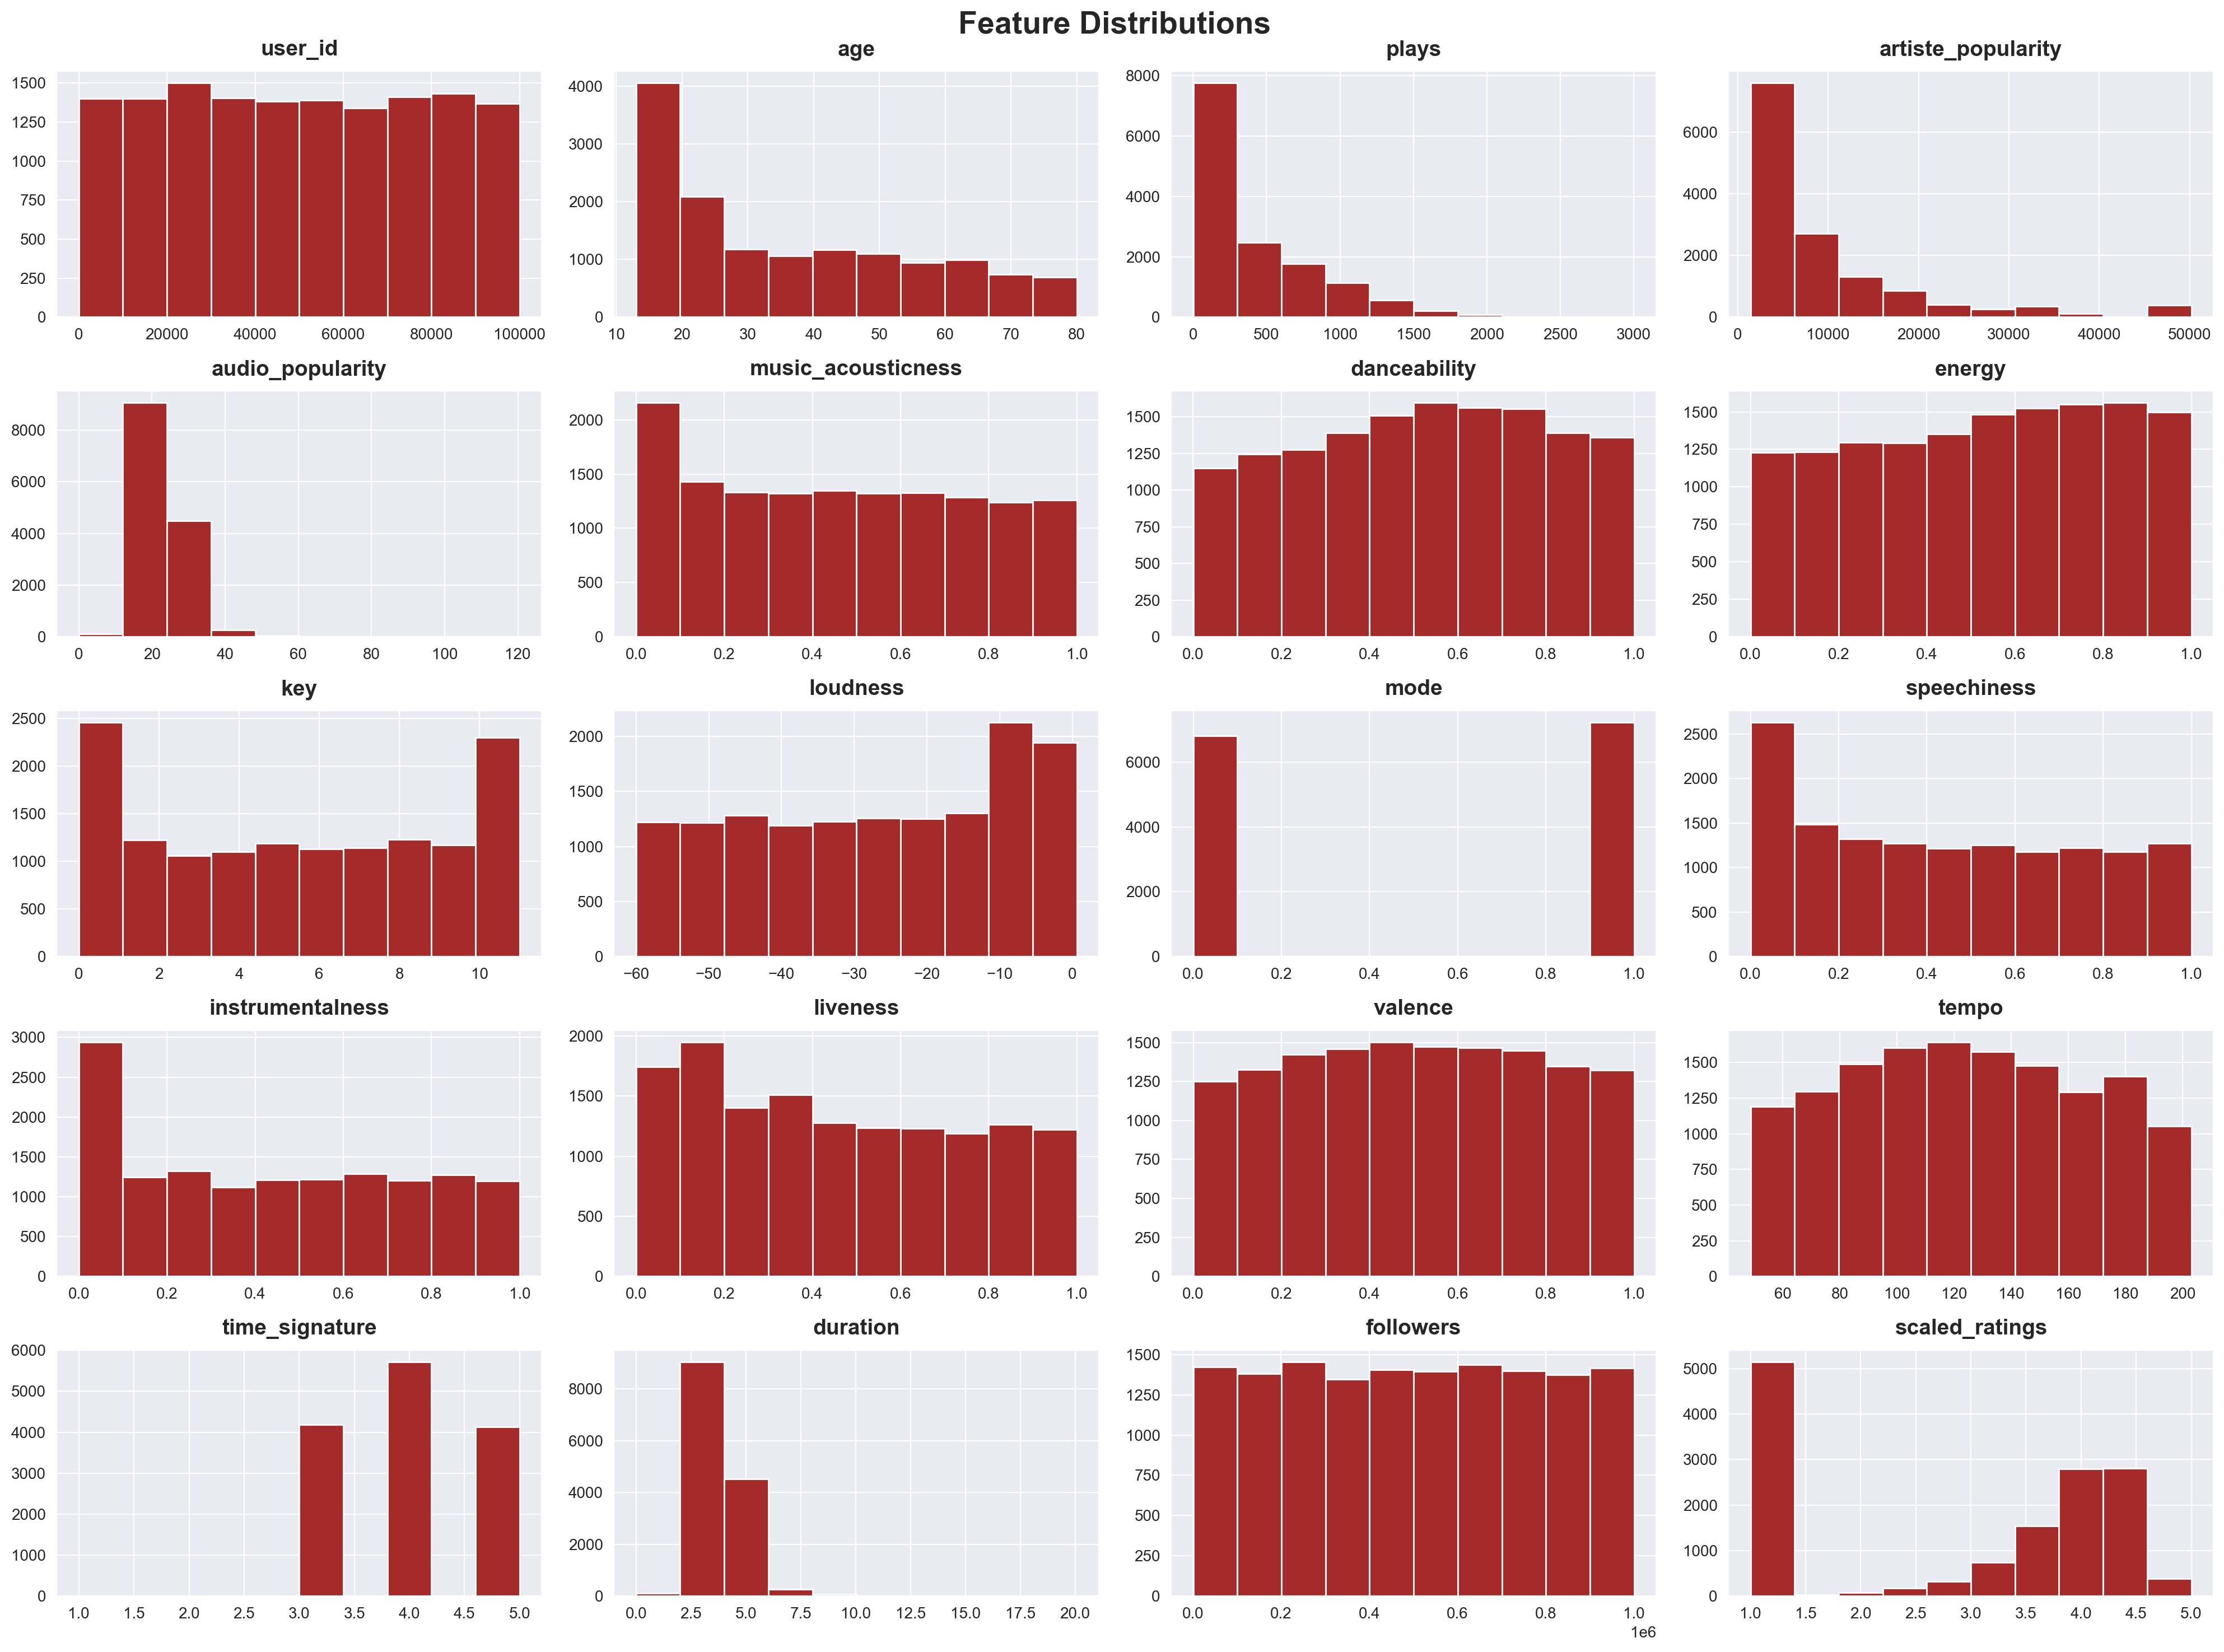

In [6]:
# Plot histograms
supt_presets = dict(fontsize = 20, fontweight = 'bold')

df.hist(figsize=(20, 15), color = 'blue')
plt.suptitle('Feature Distributions', **supt_presets)
plt.show()


In [ ]:
df.select_dtypes(include = ['category', 'object']).columns.tolist()

mismatch between cell counter (15) and saved ipython counter (13)
fixing up to actual counter of 13


['education',
 'gender',
 'name',
 'country',
 'music',
 'artist_name',
 'featured_artists',
 'genre',
 'track_genre',
 'release_date',
 'music_id',
 'id_artists']

In [ ]:
plt.pie()

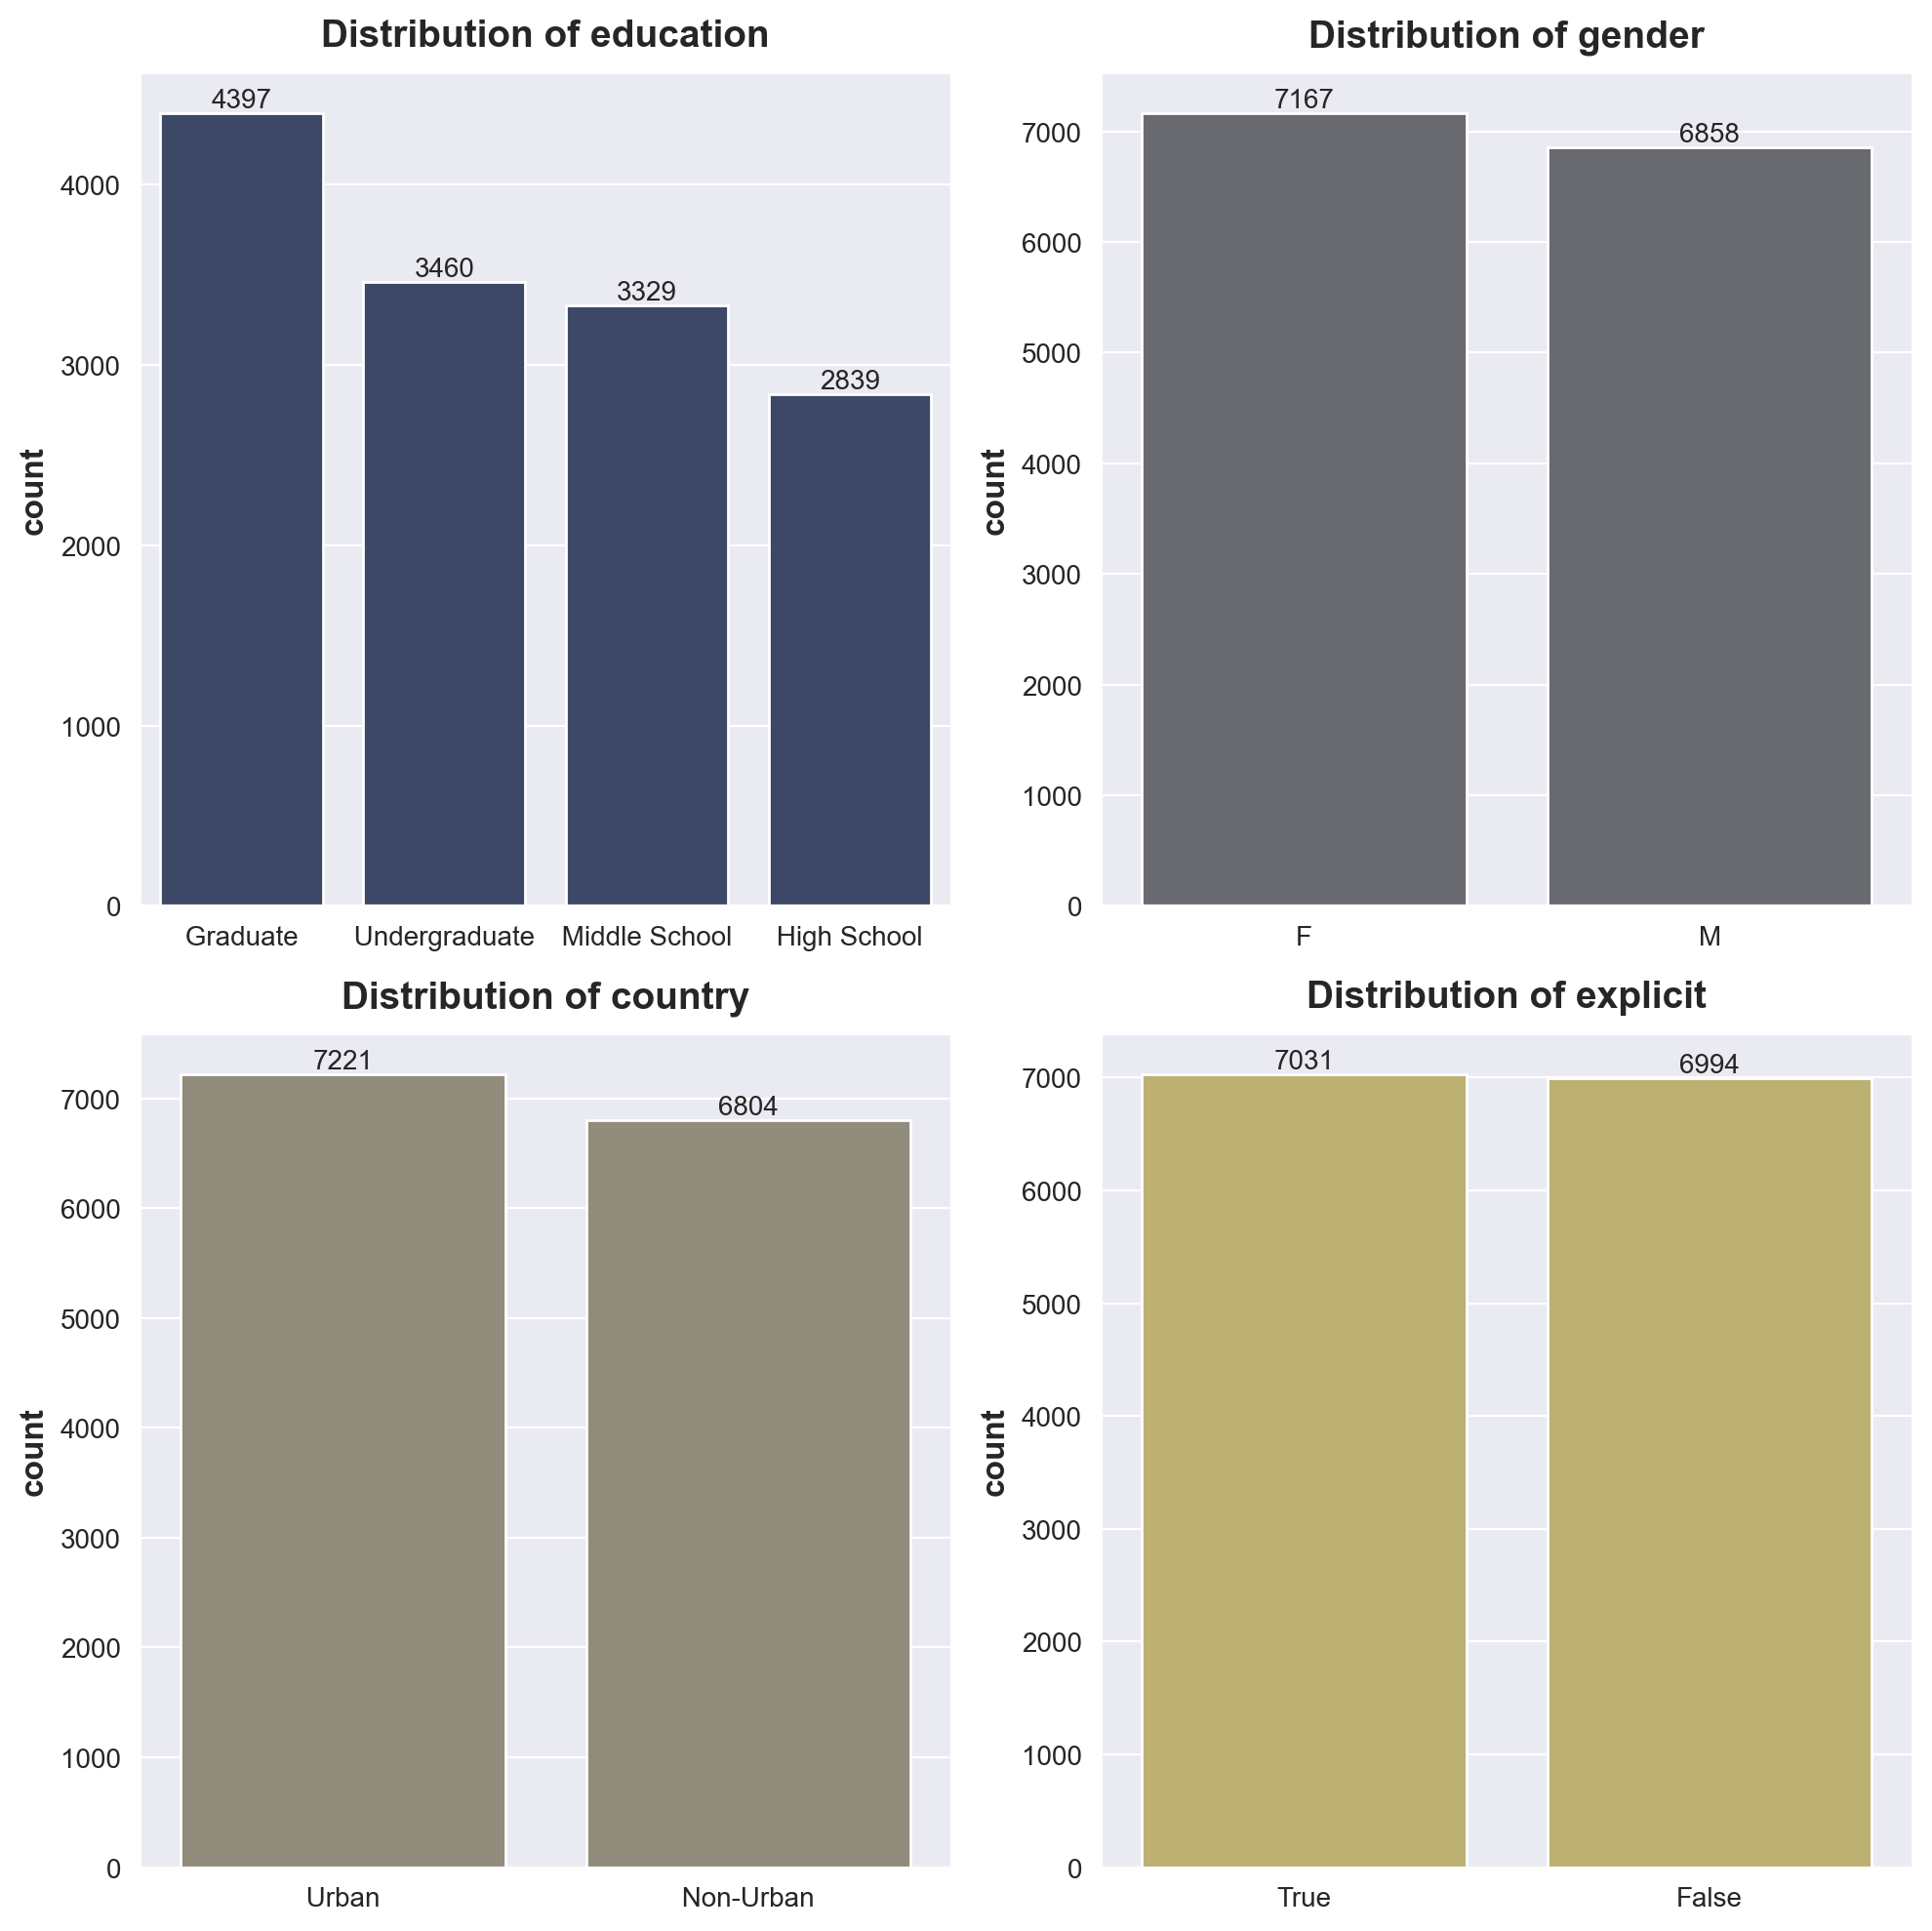

In [30]:
# #distribution of categorical columns
# import matplotlib.pyplot as plt
# import seaborn as sns

# cat_cols = ['education', 'gender', 'country', 'explicit']
# fig, axes = plt.subplots(2, 2, figsize=(10, 10))
# cc = sns.color_palette(n_colors = len(cat_cols), palette = 'cividis')

# for i, ax in enumerate(axes.flatten()):
#     # Count the occurrences of each category
#     count_data = df[cat_cols[i]].value_counts().sort_values(ascending=False)
#     sns.countplot(x=cat_cols[i], data=df, order=count_data.index, ax=ax, color = cc[i])
#     ax.set(xlabel = '', title = f'Distribution of {cat_cols[i]}')
#     ax.bar_label(ax.containers[0], fmt="%.0f")
# plt.show()


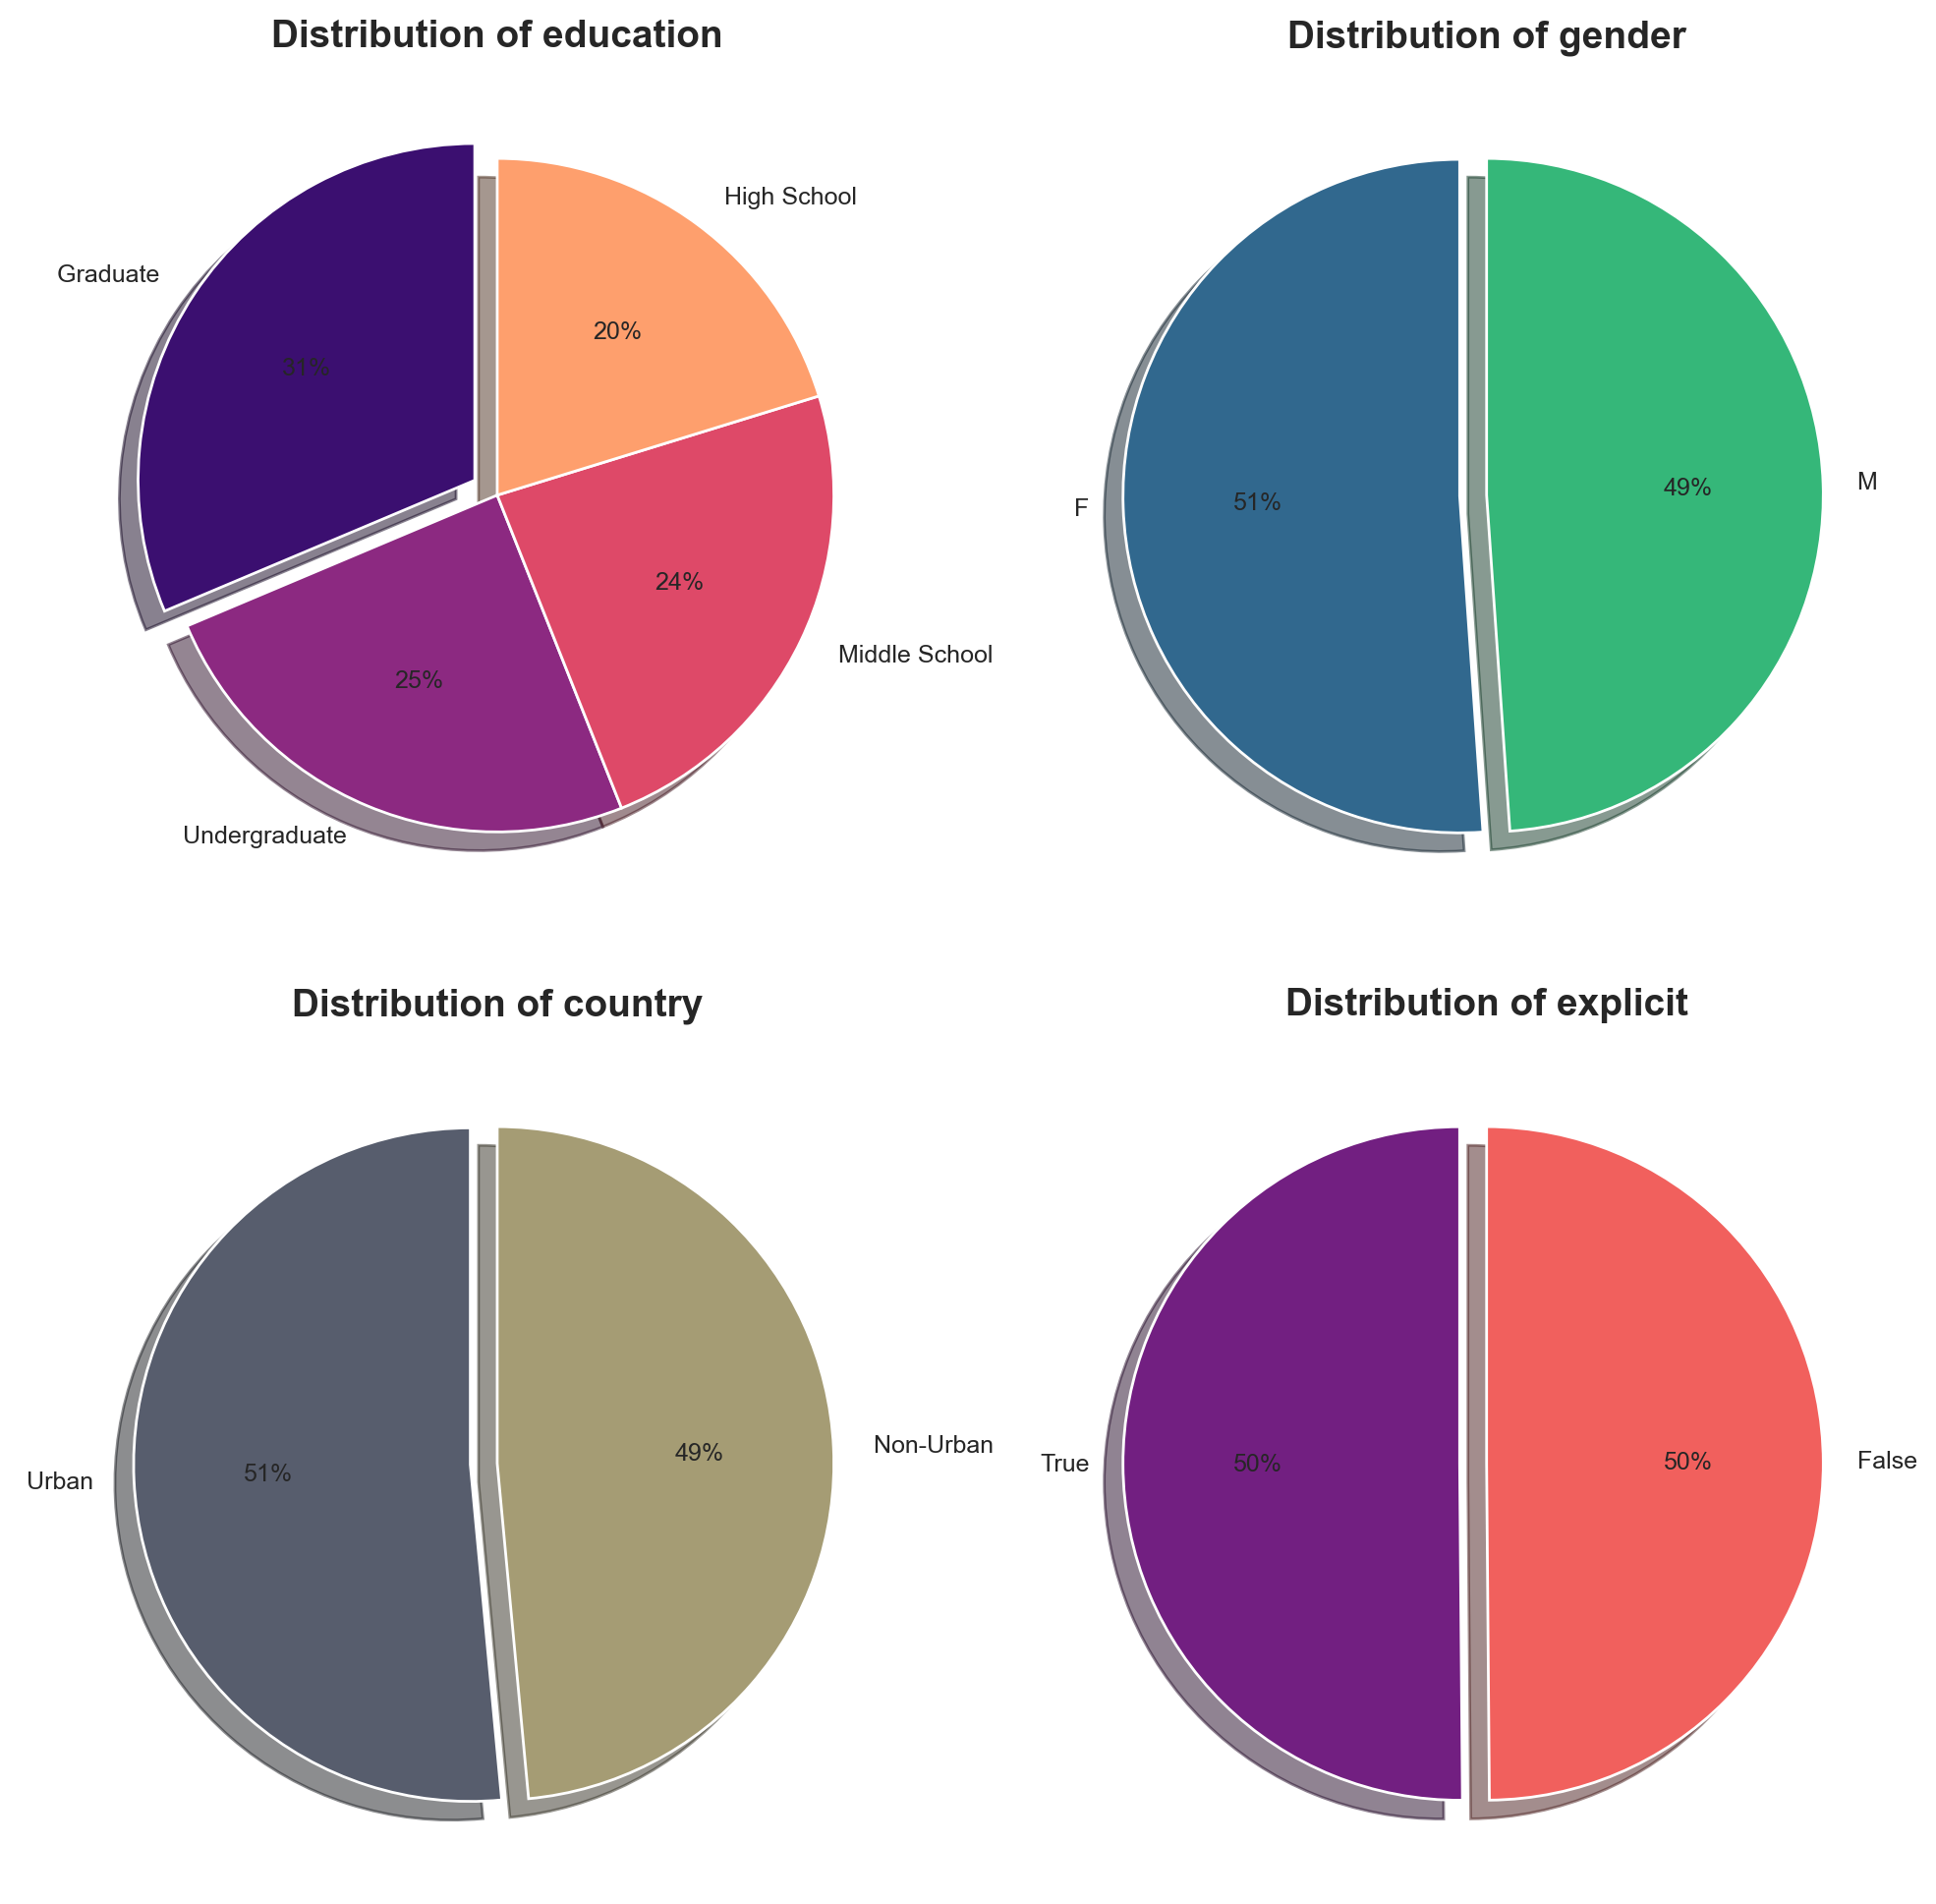

In [82]:

cat_cols = ['education', 'gender', 'country', 'explicit']
fig, axes = plt.subplots(2, 2, figsize=(10, 10))
cc = ['magma', 'viridis', 'cividis', 'magma']

for i, ax in enumerate(axes.flatten()):
    # Count the occurrences of each category
    count_data = df[cat_cols[i]].value_counts().sort_values(ascending=False)
    # Create pie chart
    n = count_data.shape[0]
    wedges, texts, autotexts = ax.pie(count_data, labels=count_data.index, autopct="%.0f%%",
                                      colors= sns.color_palette(n_colors = n, palette = cc[i]), startangle = 90,
                                      textprops={'fontsize': 9}, explode =[0.08] + [0] * (n - 1), shadow = True)
    ax.set(title=f'Distribution of {cat_cols[i]}')
    
plt.tight_layout()
plt.show();

In [35]:
df.groupby('artist_name')['plays'].sum().sort_values(ascending = False).head(20)

artist_name
Drake             173501
Kanye West         68502
Kendrick Lamar     60249
The Weeknd         57411
Rihanna            56747
                   ...  
Migos              36667
Lil Wayne          36378
Calvin Harris      35516
Maroon 5           35053
Post Malone        34886
Name: plays, Length: 20, dtype: int64

C:\Users\David Yeboah\AppData\Local\Temp\ipykernel_8888\1879562271.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(df, y = 'genre', order = count_order.index, ax = ax, palette = 'cividis', legend = False)


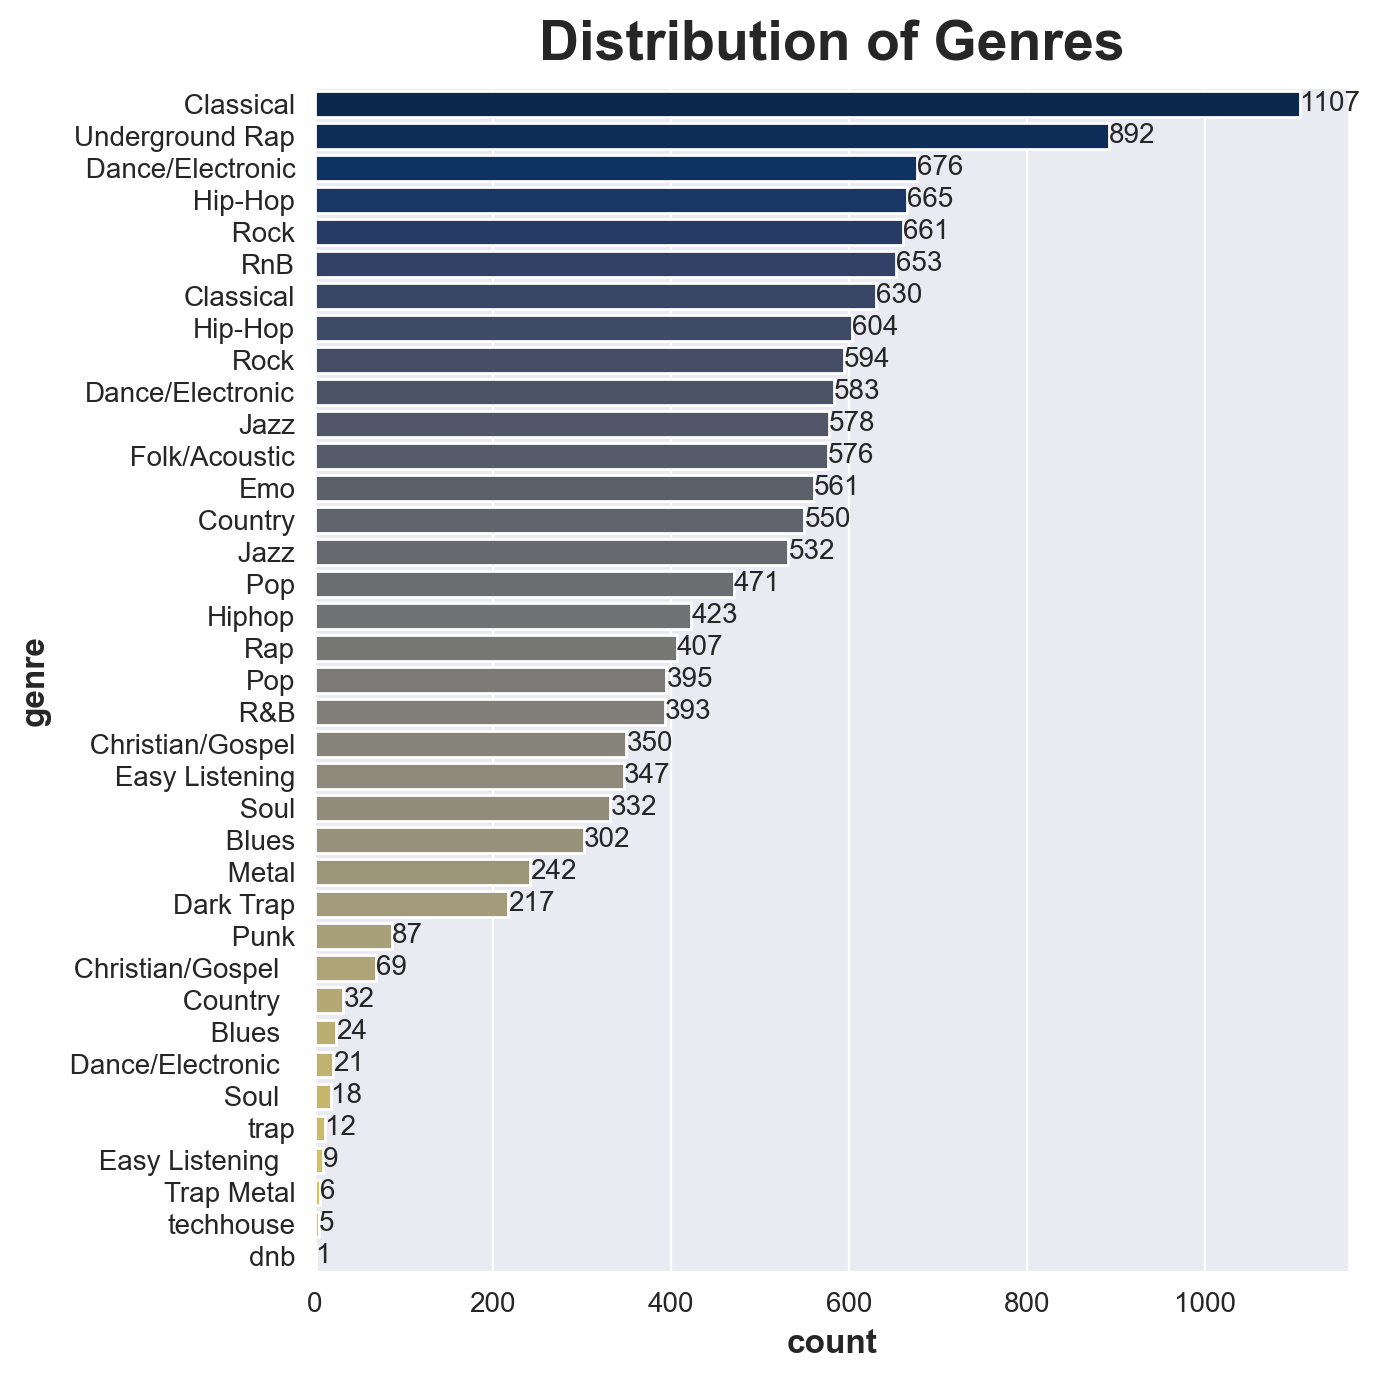

In [24]:
count_order = df['genre'].value_counts().sort_values(ascending= False)
fig, ax = plt.subplots(figsize = (7, 7))
sns.countplot(df, y = 'genre', order = count_order.index, ax = ax, palette = 'cividis', legend = False)
ax.set_title('Distribution of Genres', **supt_presets)
for container in ax.containers:
    ax.bar_label(container, fmt="%.0f");

## Examining Popularity of Artists
---

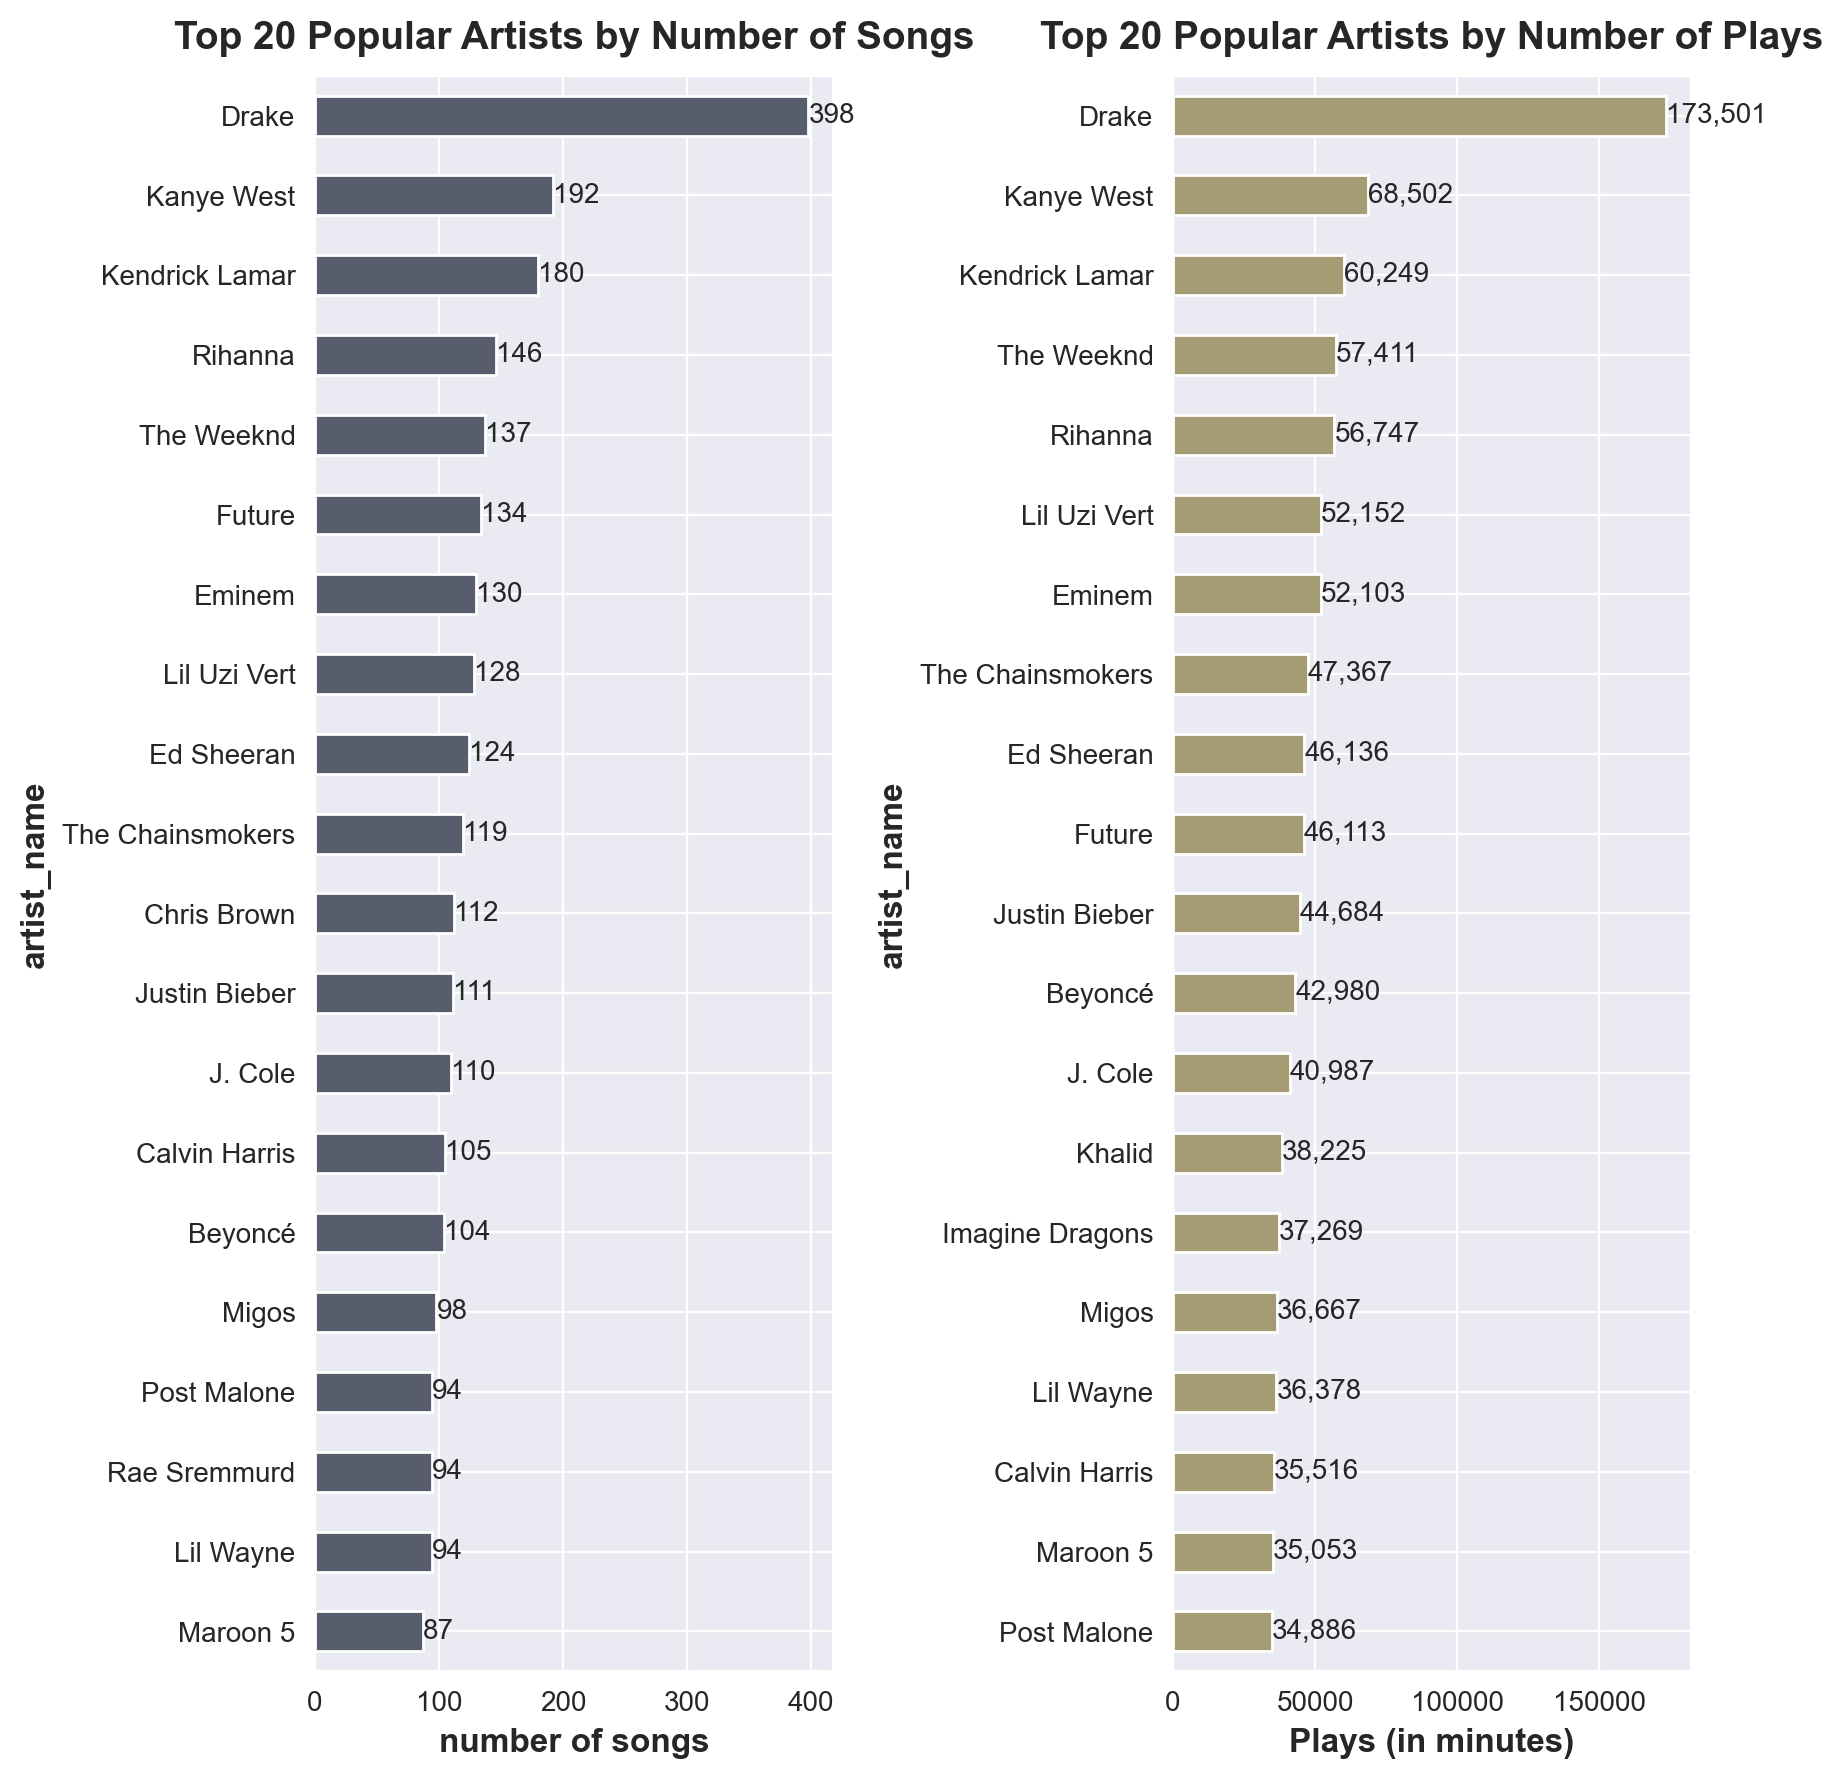

In [41]:

fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (9, 9))
TAIL = 20
cc_ = sns.color_palette(n_colors= 2, palette = 'cividis')

df['artist_name'].value_counts().sort_values().tail(TAIL).plot(kind = 'barh', color = cc_[0], ax = ax1)
ax1.set(title = f'Top {TAIL} Popular Artists by Number of Songs', xlabel = 'number of songs')
for container in ax1.containers:
    ax1.bar_label(container, fmt = "%.0f")

df.groupby('artist_name')['plays'].sum().sort_values().tail(TAIL).plot(kind = 'barh', color = cc_[1], ax = ax2)
ax2.set(title = f'Top {TAIL} Popular Artists by Number of Plays', xlabel = 'Plays (in minutes)')
for container in ax2.containers:
    ax2.bar_label(container, labels=[f"{int(v):,}" for v in container.datavalues])

plt.tight_layout();

In [67]:
date_cols = [col for col in df.columns if 'date' in col]
for col in date_cols:
    df[col] = pd.to_datetime(df[col], errors = 'coerce').dropna(axis = 0)

mismatch between cell counter (68) and saved ipython counter (67)
fixing up to actual counter of 67


Index(['user_id', 'age', 'education', 'gender', 'name', 'country', 'music',
       'artist_name', 'featured_artists', 'genre', 'plays',
       'artiste_popularity', 'audio_popularity', 'music_acousticness',
       'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature',
       'track_genre', 'release_date', 'explicit', 'duration', 'music_id',
       'id_artists', 'followers', 'scaled_ratings'],
      dtype='object')

In [104]:
duration_over_time = df.groupby('release_date')[['duration']].mean()
plays_over_time = df.groupby('release_date')[['plays']].mean()

display(duration_over_time.head(5))
display(plays_over_time.head(5))

duration
release_date          
1953-08-01    2.680000
1956-10-19    2.410000
1957-06-20    1.500000
1957-10-15    2.063333
1958-03-21    2.326667

plays
release_date            
1953-08-01    225.000000
1956-10-19    356.000000
1957-06-20      1.000000
1957-10-15    353.333333
1958-03-21    868.000000

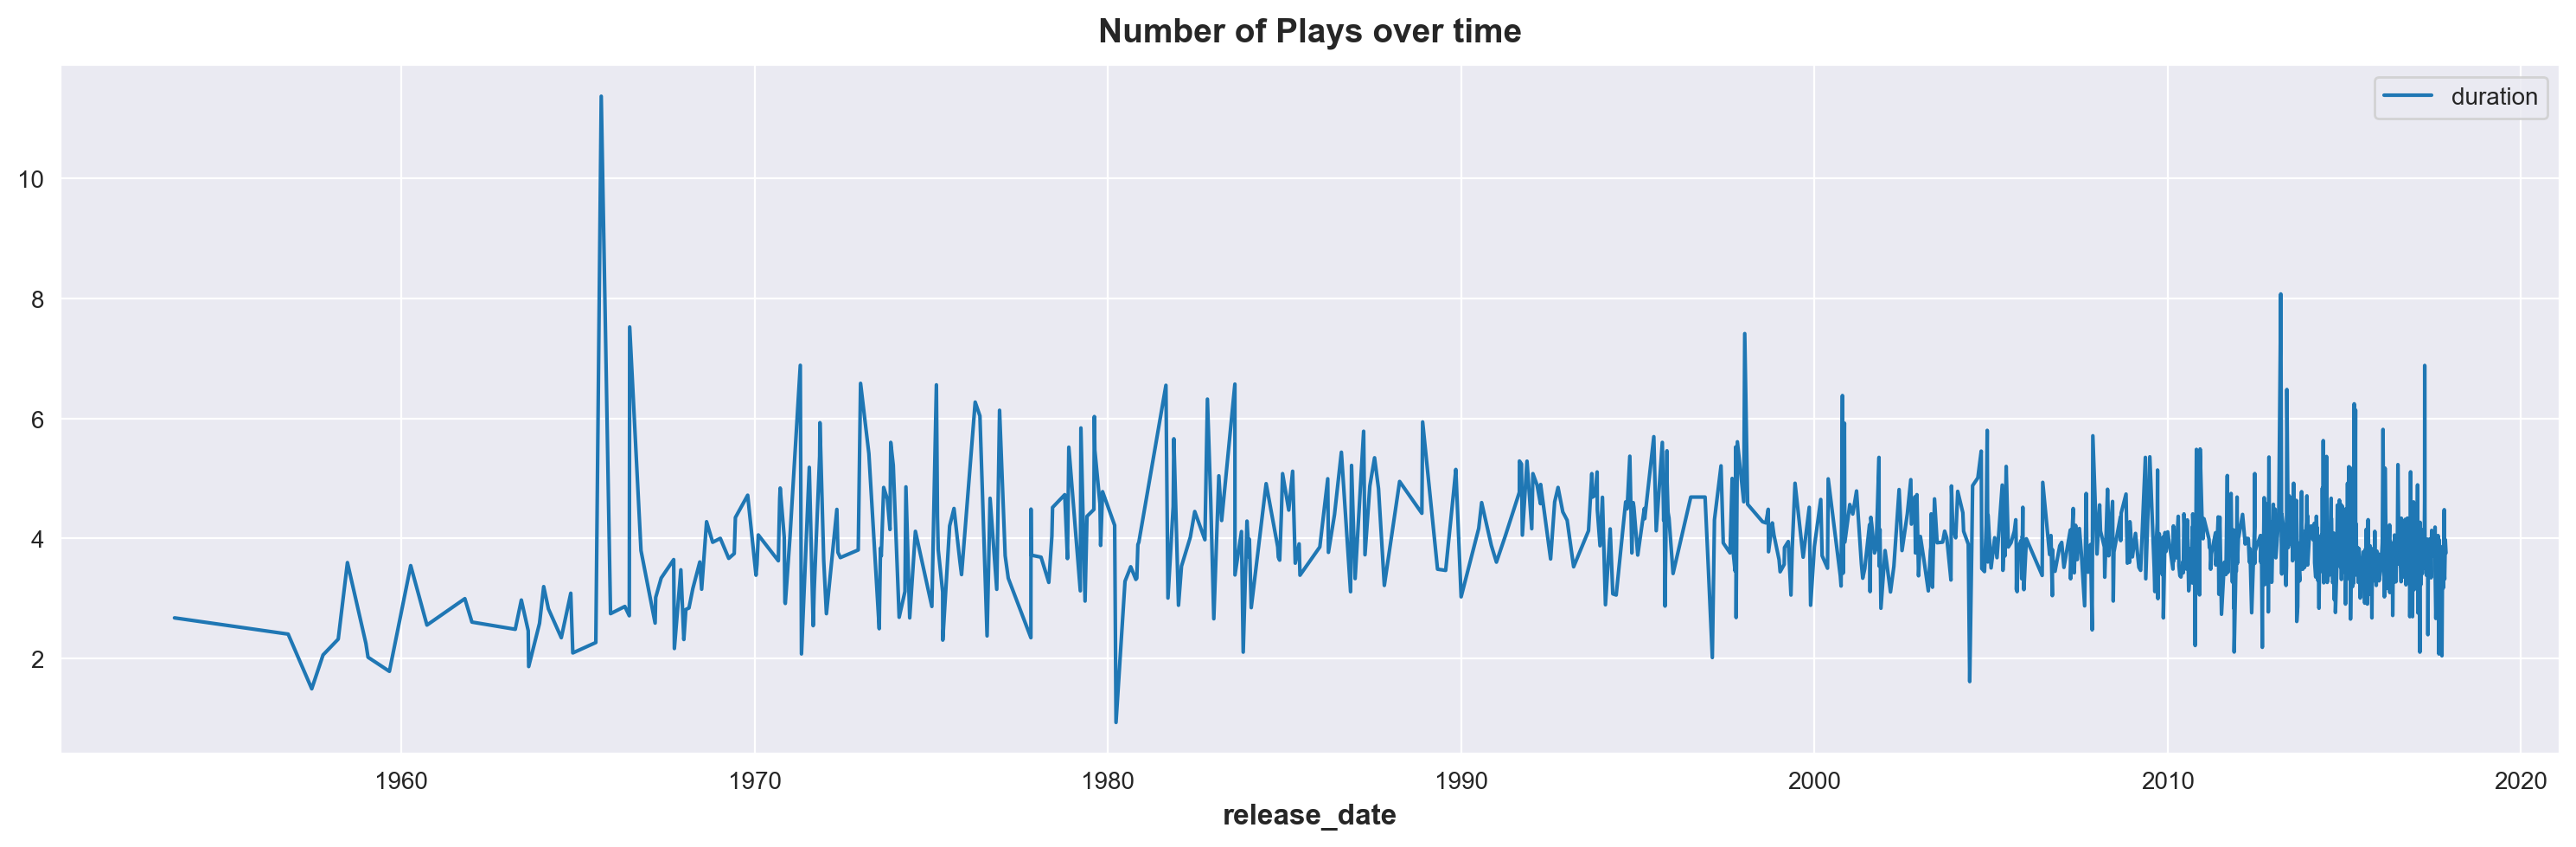

In [103]:
plt.figure(figsize = (15, 5))
sns.lineplot(duration_over_time)
plt.xlabel('Average duration of songs')
plt.title('Number of Plays over time')
plt.show();

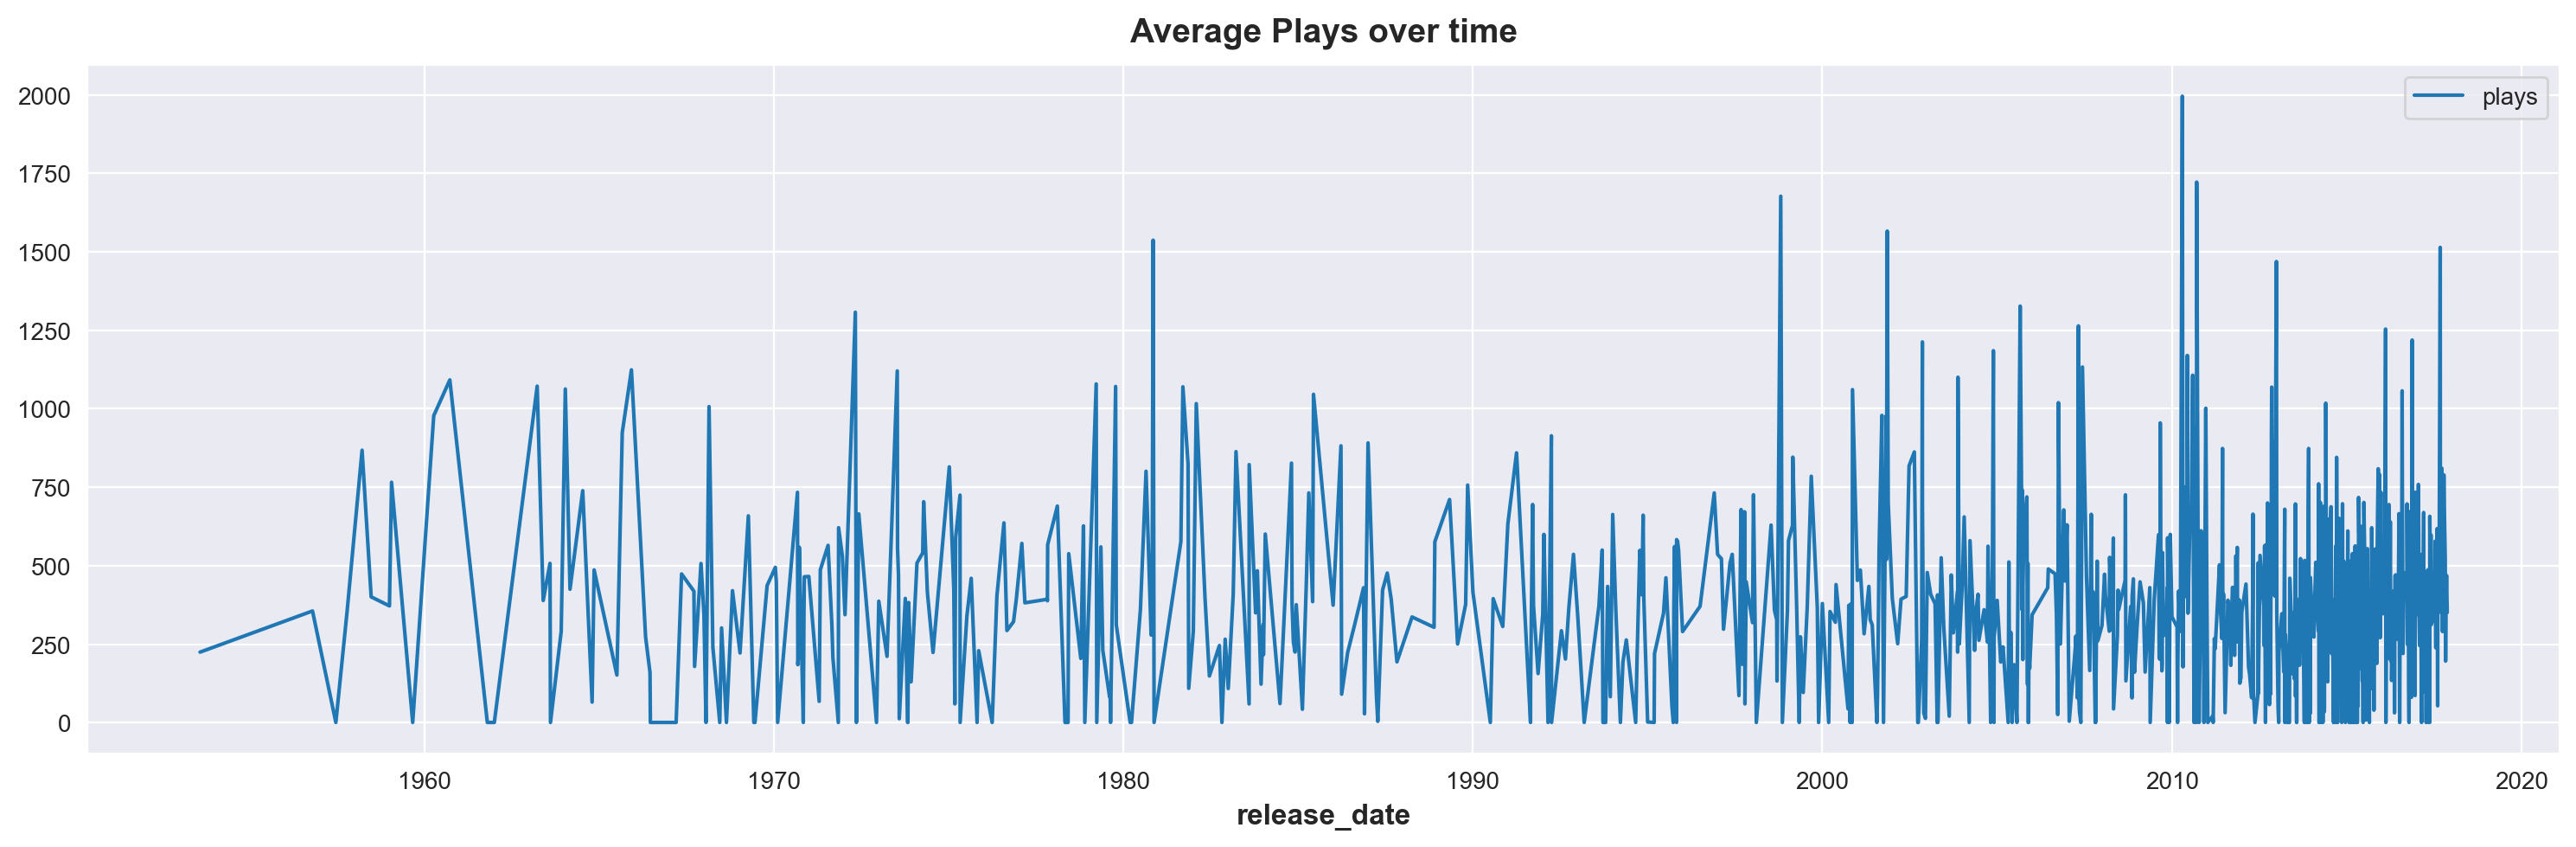

In [106]:
plt.figure(figsize = (15, 5))
sns.lineplot(plays_over_time)
plt.title('Average Plays over time')
plt.show();

In [110]:
#Plot a correlation heatmap
plt.figure(figsize=(10, 8))
correlation_matrix = df.corr(numeric_only= True)
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show();

In [77]:
# import matplotlib.pyplot as plt
# import seaborn as sns

# # Distribution of numerical features
# num
# numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns

# for column in numerical_columns:
#     plt.figure(figsize=(10, 4))
#     sns.histplot(df[column], kde=True)
#     plt.title(f'Distribution of {column}')
#     plt.show()

# # Distribution of categorical features
# categorical_columns = df.select_dtypes(include=['object', 'bool']).columns

# for column in categorical_columns:
#     plt.figure(figsize=(10, 4))
#     sns.countplot(y=df[column])
#     plt.title(f'Distribution of {column}')
#     plt.show()

In [78]:
# df.info()

In [79]:
# # Fill missing values in 'featured_artists' and 'genre'
# df["featured_artists"].fillna("No Featured Artists", inplace=True)
# df["genre"].fillna("Unknown", inplace=True)

In [80]:
# # Convert to 'category' data type
# df['gender'] = df['gender'].astype('category')
# df['education'] = df['education'].astype('category')

# # Encode categorical variables
# df["gender"] = df["gender"].cat.codes
# df["education"] = df["education"].cat.codes

In [90]:
pivot_table = df.pivot_table(values='plays', index='education', columns='gender', aggfunc='mean')
display(pivot_table)

mismatch between cell counter (93) and saved ipython counter (90)
fixing up to actual counter of 90


gender                    F           M
education                              
 Graduate        388.054310  377.227732
 High School     364.016118  383.126771
 Middle School   389.844391  385.083184
 Undergraduate   364.090238  380.387515

mismatch between cell counter (117) and saved ipython counter (112)
fixing up to actual counter of 112


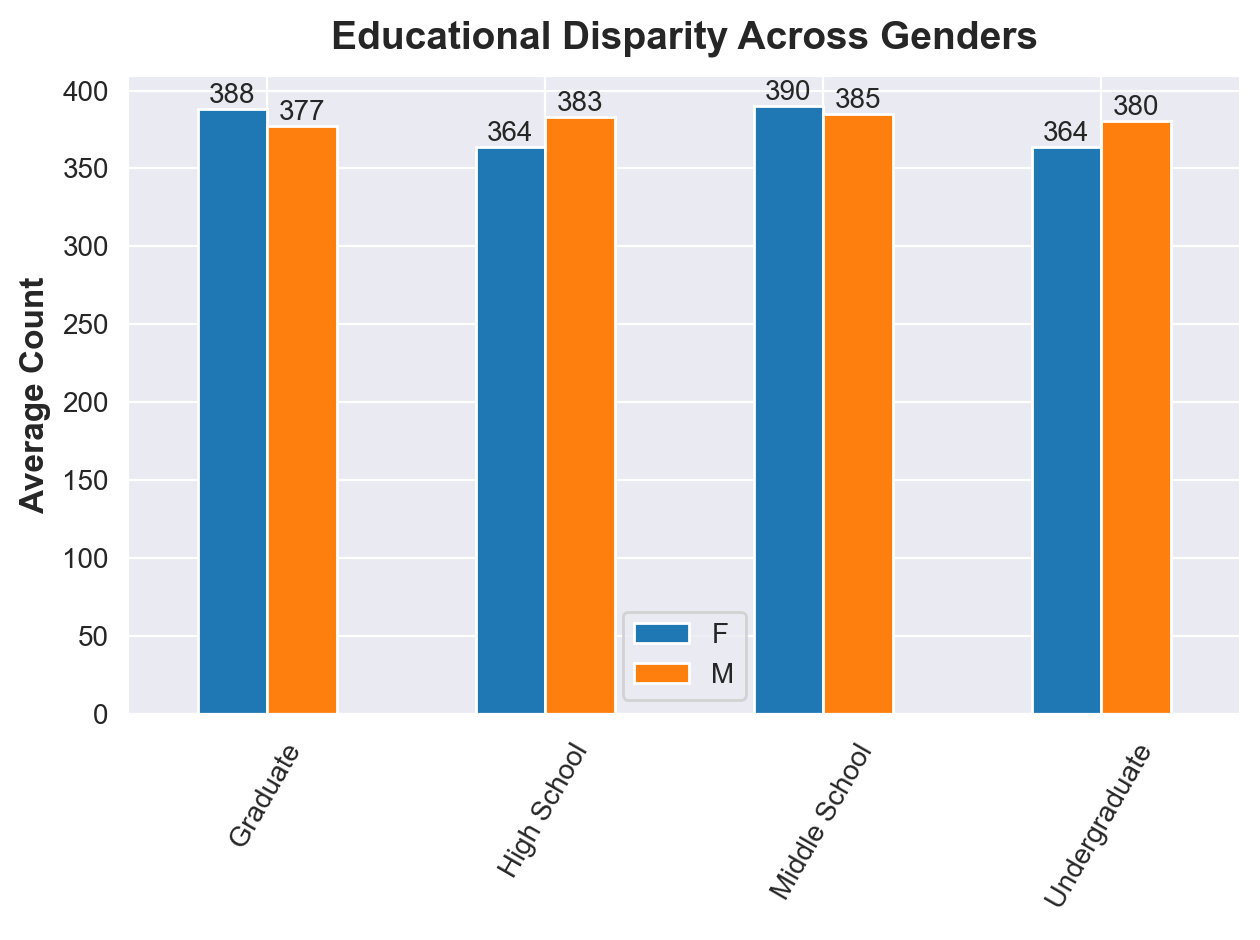

In [112]:
fig, ax = plt.subplots()
pivot_table.plot(kind = 'bar', ax = ax);
ax.set(xlabel = '', ylabel = 'Average Count', title = 'Educational Disparity Across Genders')
ax.set_xticklabels(ax.get_xticklabels(), rotation = 60)
for container in ax.containers:
    ax.bar_label(container, fmt = "%.0f")
ax.legend();

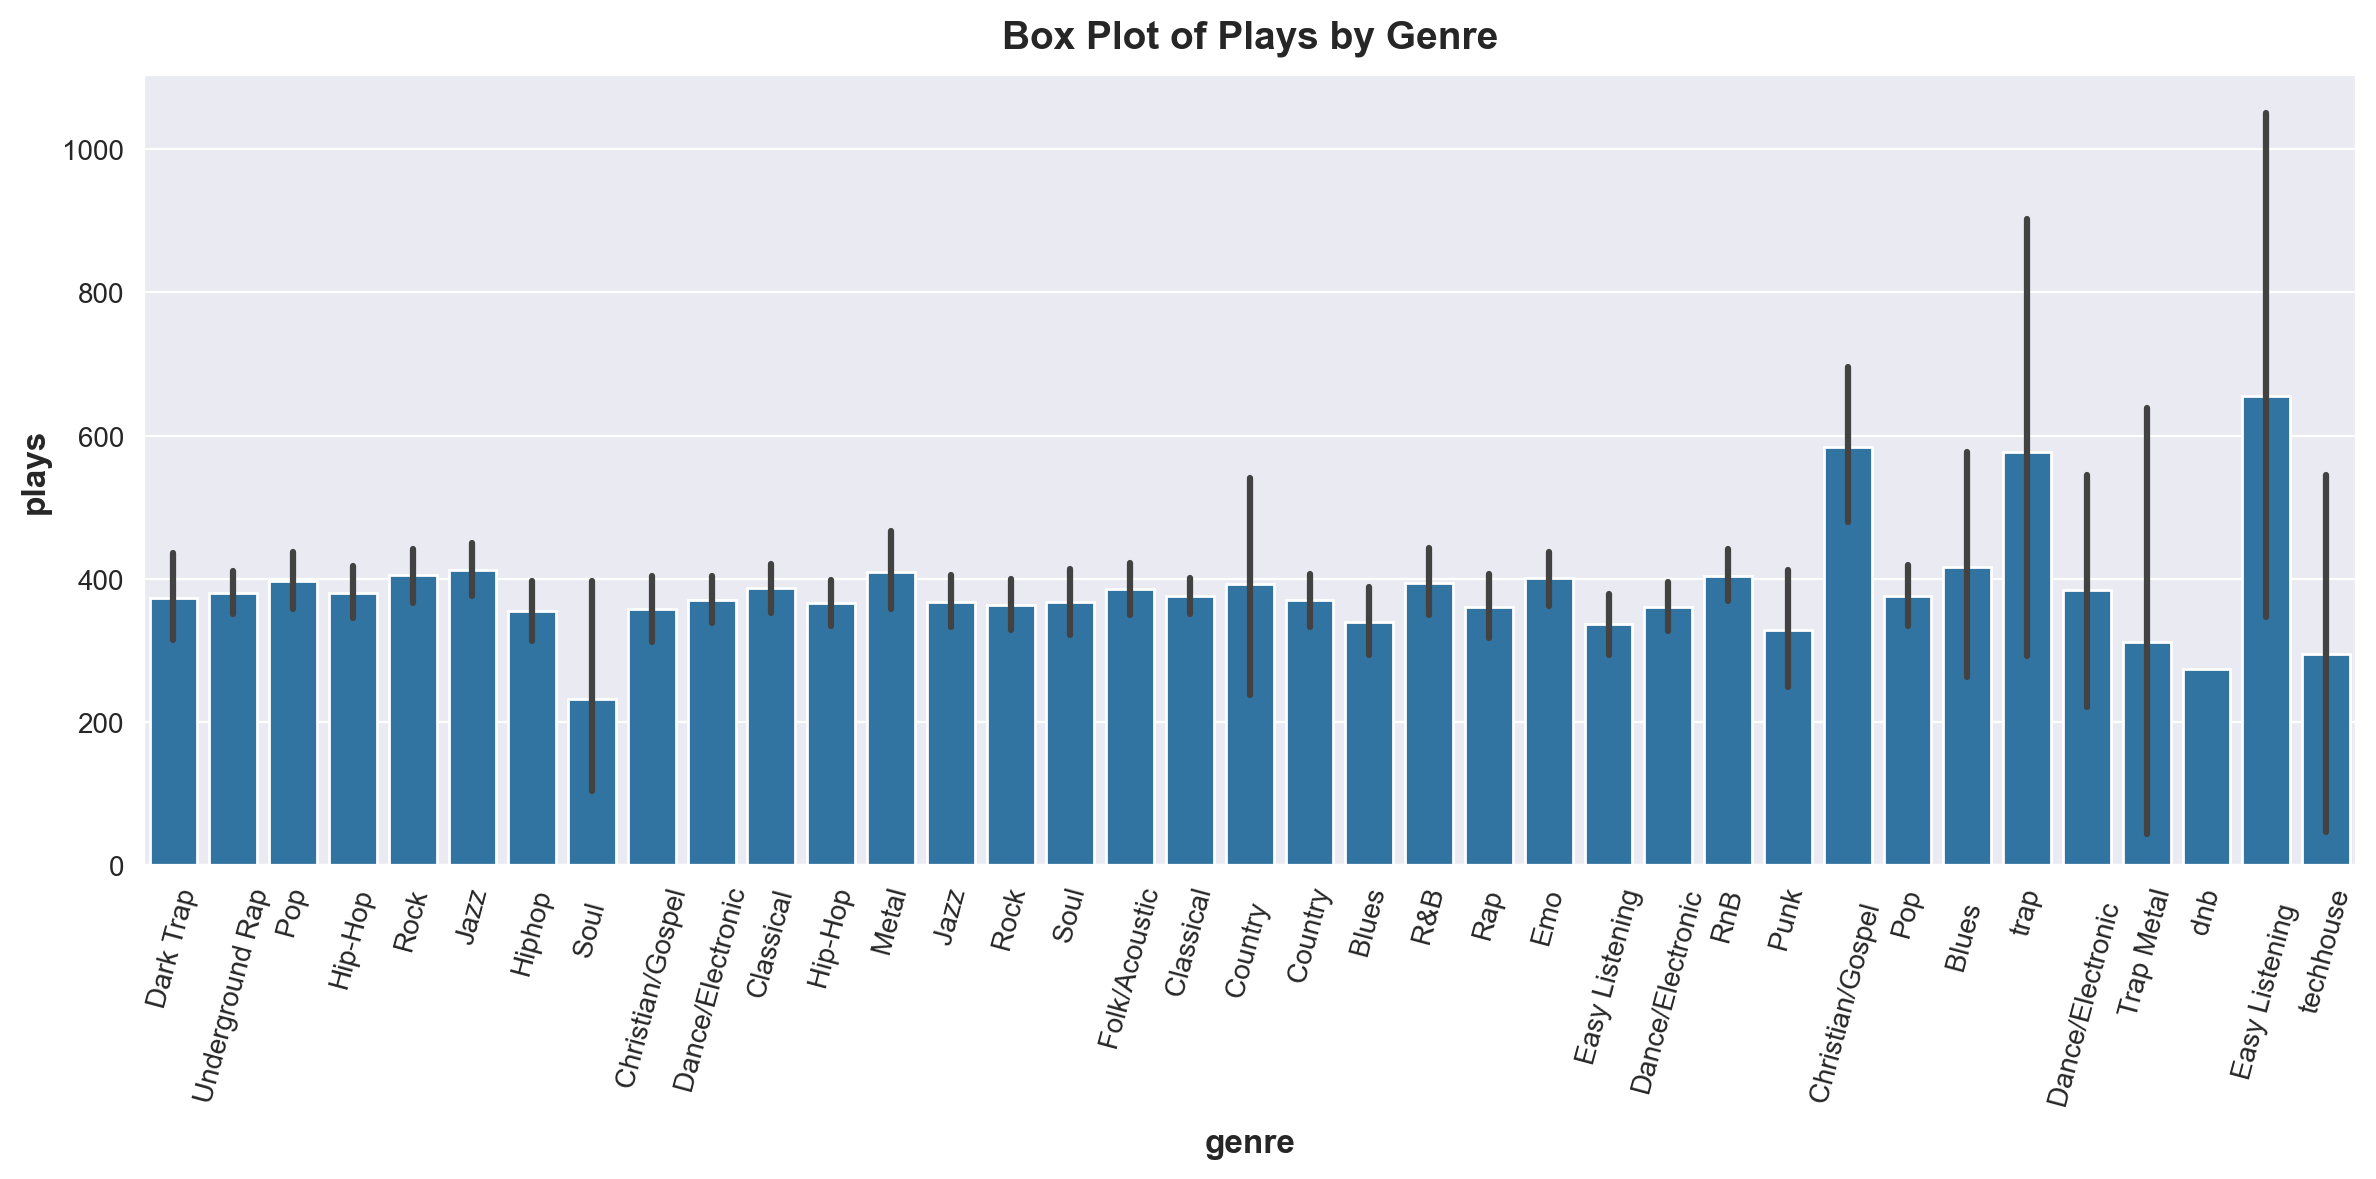

In [121]:
plt.figure(figsize = (12, 6))
sns.barplot(x='genre', y='plays', data=df)
plt.xticks(rotation=75)
plt.title('Box Plot of Plays by Genre')
plt.show();

In [134]:
grouped_stats1 = df.groupby('education')[['plays', 'duration']].mean()
display(grouped_stats1)

mismatch between cell counter (141) and saved ipython counter (134)
fixing up to actual counter of 134


plays  duration
education                            
 Graduate        382.940186  3.873673
 High School     373.520958  3.881279
 Middle School   387.454491  3.893635
 Undergraduate   372.088150  3.876182

In [137]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (13, 5))
grouped_stats1[['duration']].plot(ax = ax1)
ax1.set(ylabel = 'Average duration of songs', title = 'Song Durations Popular Among different Educational levels')

grouped_stats1[['plays']].plot(ax = ax2)
ax2.set(ylabel = 'Average plays of songs', title = 'Number of Plays Among different Educational levels')
plt.show();


mismatch between cell counter (139) and saved ipython counter (137)
fixing up to actual counter of 137


In [159]:
df.select_dtypes(include = 'number').columns.tolist()

['user_id',
 'age',
 'plays',
 'artiste_popularity',
 'audio_popularity',
 'music_acousticness',
 'danceability',
 'energy',
 'key',
 'loudness',
 'mode',
 'speechiness',
 'instrumentalness',
 'liveness',
 'valence',
 'tempo',
 'time_signature',
 'duration',
 'followers',
 'scaled_ratings']

In [163]:
def create_clusters(df_: pd.DataFrame):
    df = df_.copy()
    numerical_features = df.select_dtypes(include = 'number').columns.tolist()
    # Standardize the features
    scaler = StandardScaler()
    scaled_features = scaler.fit_transform(df[numerical_features])

    # Apply K-means clustering
    kmeans = KMeans(n_clusters=3, random_state=42)
    clusters = kmeans.fit_predict(scaled_features)

    # Add the cluster labels to the original DataFrame
    df['cluster'] = clusters + 1

    # Visualize the clusters
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (13, 6))
    sns.scatterplot(x='plays', y='age', hue='cluster', data= df, palette='viridis', ax = ax1)
    sns.scatterplot(x='plays', y='duration', hue='cluster', data=df, palette='viridis', ax = ax2)
    plt.suptitle('K-means Clustering of Numerical Features', **supt_presets)
    plt.show()

create_clusters(df)

## Analysis of Song Names
---

In [168]:
from wordcloud import WordCloud
from collections import Counter
import nltk
from nltk.corpus import stopwords
import string

df_ = read_data("data/cleaned_data.csv")
# Text Preprocessing
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to C:\Users\David
[nltk_data]     Yeboah\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [169]:
def preprocess_text(text):
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    # Convert to lowercase
    text = text.lower()
    # Remove stopwords
    text = ' '.join(word for word in text.split() if word not in stop_words)
    return text

df_['cleaned_music'] = df_['music'].apply(preprocess_text)

# Word Frequency Analysis
all_words = ' '.join(df_['cleaned_music']).split()
word_freq = Counter(all_words)

In [170]:
display(df_['cleaned_music'].head(20))

0                                          bank account
1     mo money mo problems feat mase puff daddy 2014...
2                                           new friends
3                      love without tragedy mother mary
4                                                 roses
                            ...                        
15                                             man year
16                                    dont happen twice
17                                 ibetchu original mix
18                                         bank account
19                                               batter
Name: cleaned_music, Length: 20, dtype: object

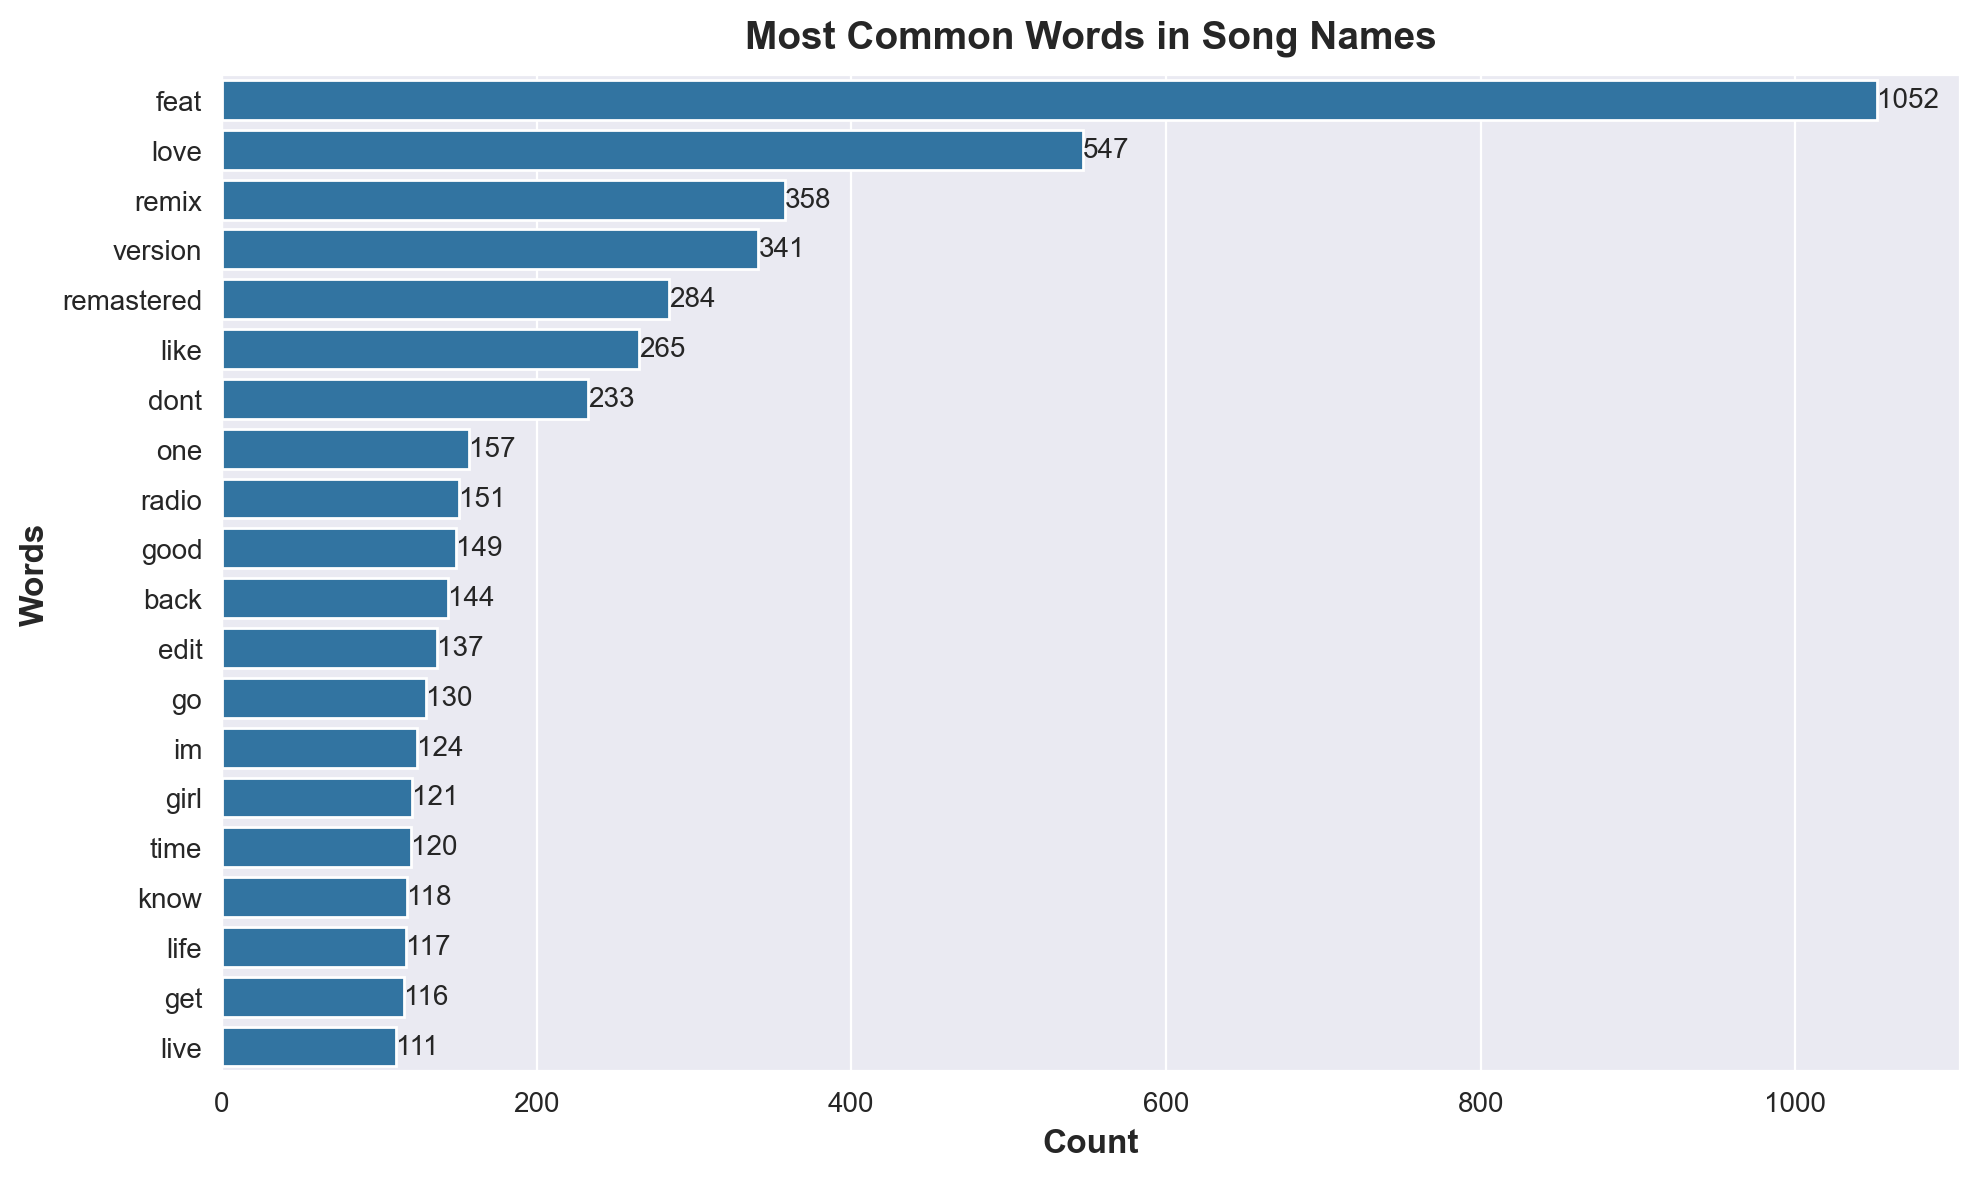

In [174]:
most_common_words = word_freq.most_common(20)

# Plotting Most Common Words
words, counts = zip(*most_common_words)
fig, ax = plt.subplots(figsize=(10, 6))
sns.barplot(x=list(counts), y=list(words), ax = ax)
plt.title('Most Common Words in Song Names')
plt.xlabel('Count')
plt.ylabel('Words')
for container in ax.containers:
    ax.bar_label(container, fmt = "%.0f")
plt.show();

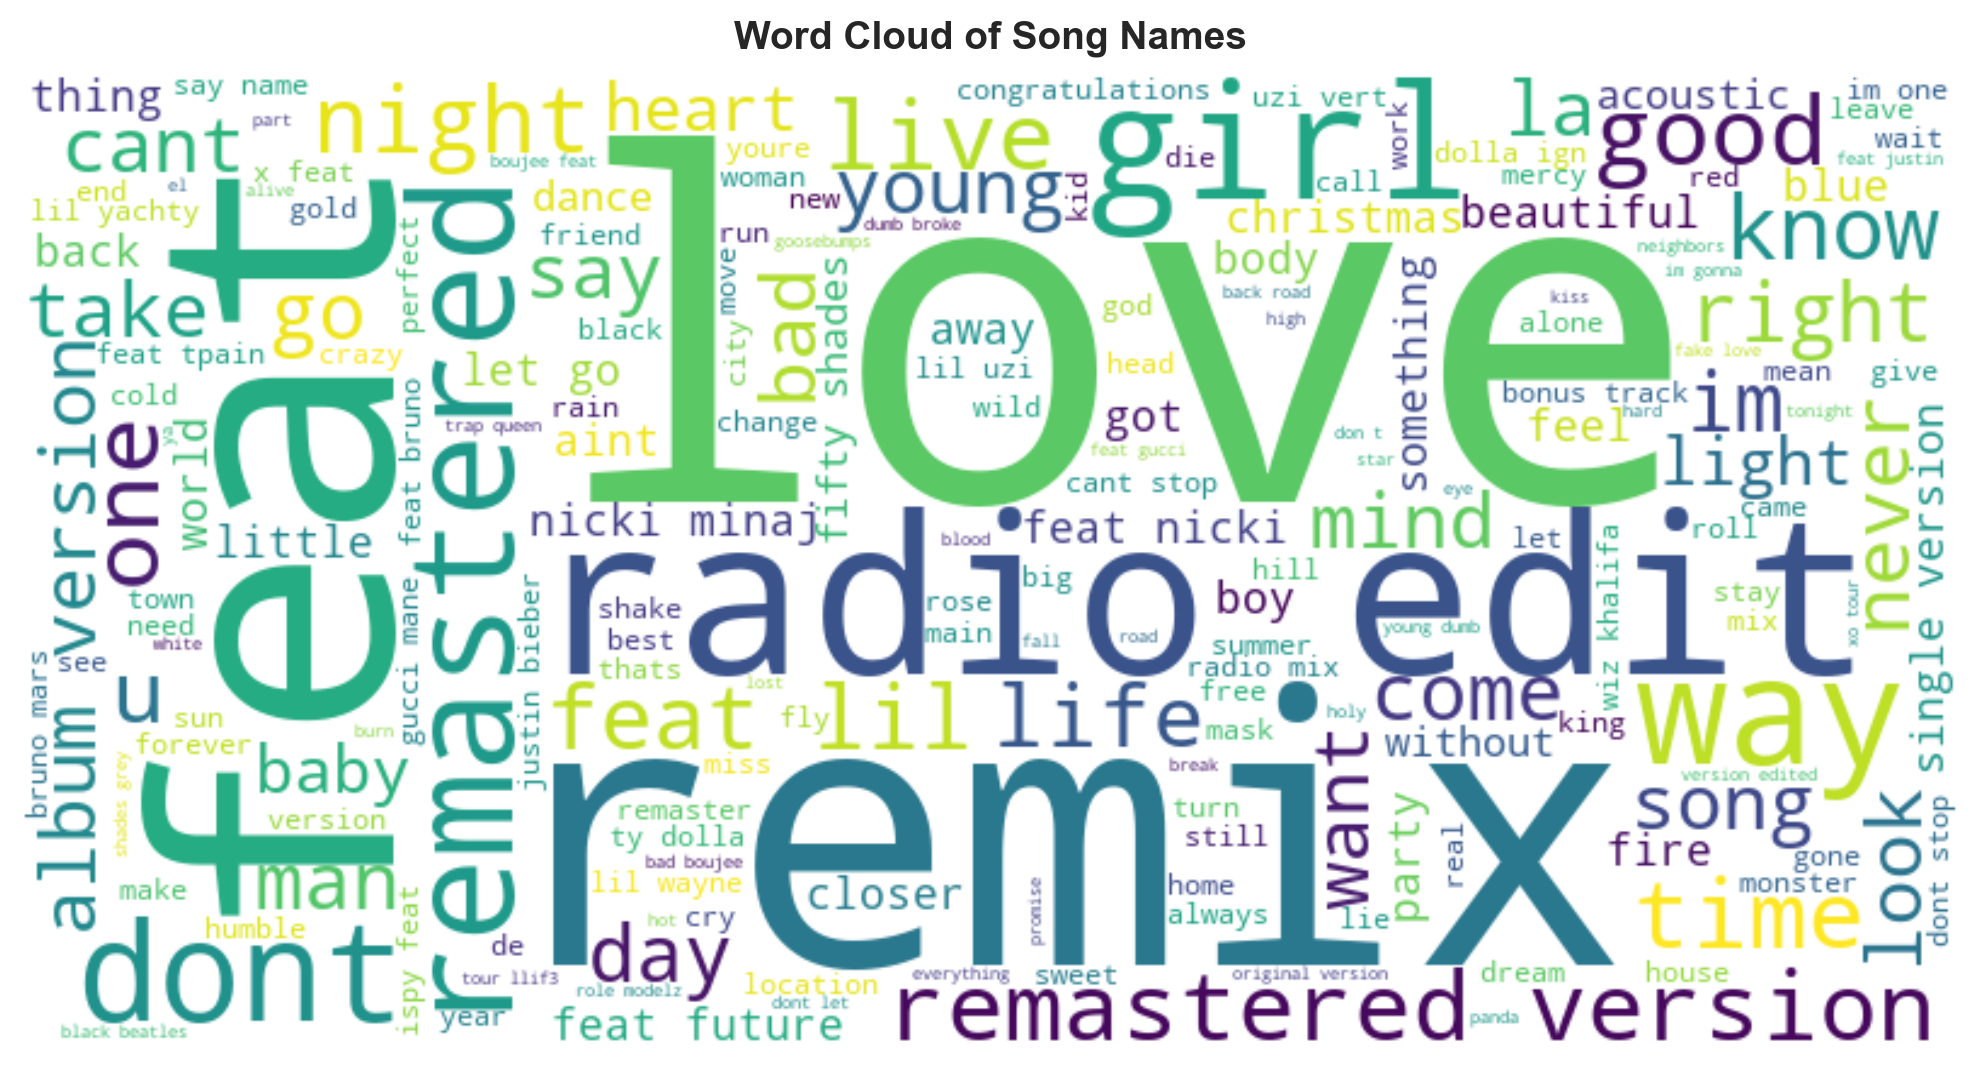

In [175]:
# Word Cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(all_words))
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Song Names')
plt.show();

## N-Gram Analysis
---

In [177]:
from nltk.util import ngrams

def get_ngrams(text, n):
    n_grams = ngrams(text.split(), n)
    return [' '.join(grams) for grams in n_grams]

df_['bigrams'] = df_['cleaned_music'].apply(lambda x: get_ngrams(x, 2))
bigram_list = [item for sublist in df_['bigrams'].tolist() for item in sublist]
bigram_freq = Counter(bigram_list)
most_common_bigrams = bigram_freq.most_common(20)

display(most_common_bigrams)

mismatch between cell counter (181) and saved ipython counter (177)
fixing up to actual counter of 177


[('radio edit', 123),
 ('remastered version', 89),
 ('feat lil', 71),
 ('album version', 49),
 ('love feat', 44),
 ('nicki minaj', 44),
 ('single version', 41),
 ('let go', 41),
 ('feat nicki', 39),
 ('remastered 2011', 37),
 ('feat future', 37),
 ('fifty shades', 32),
 ('lil yachty', 31),
 ('ty dolla', 30),
 ('dolla ign', 30),
 ('bonus track', 27),
 ('2015 remastered', 26),
 ('lil wayne', 26),
 ('dont stop', 25),
 ('say name', 25)]

mismatch between cell counter (186) and saved ipython counter (180)
fixing up to actual counter of 180


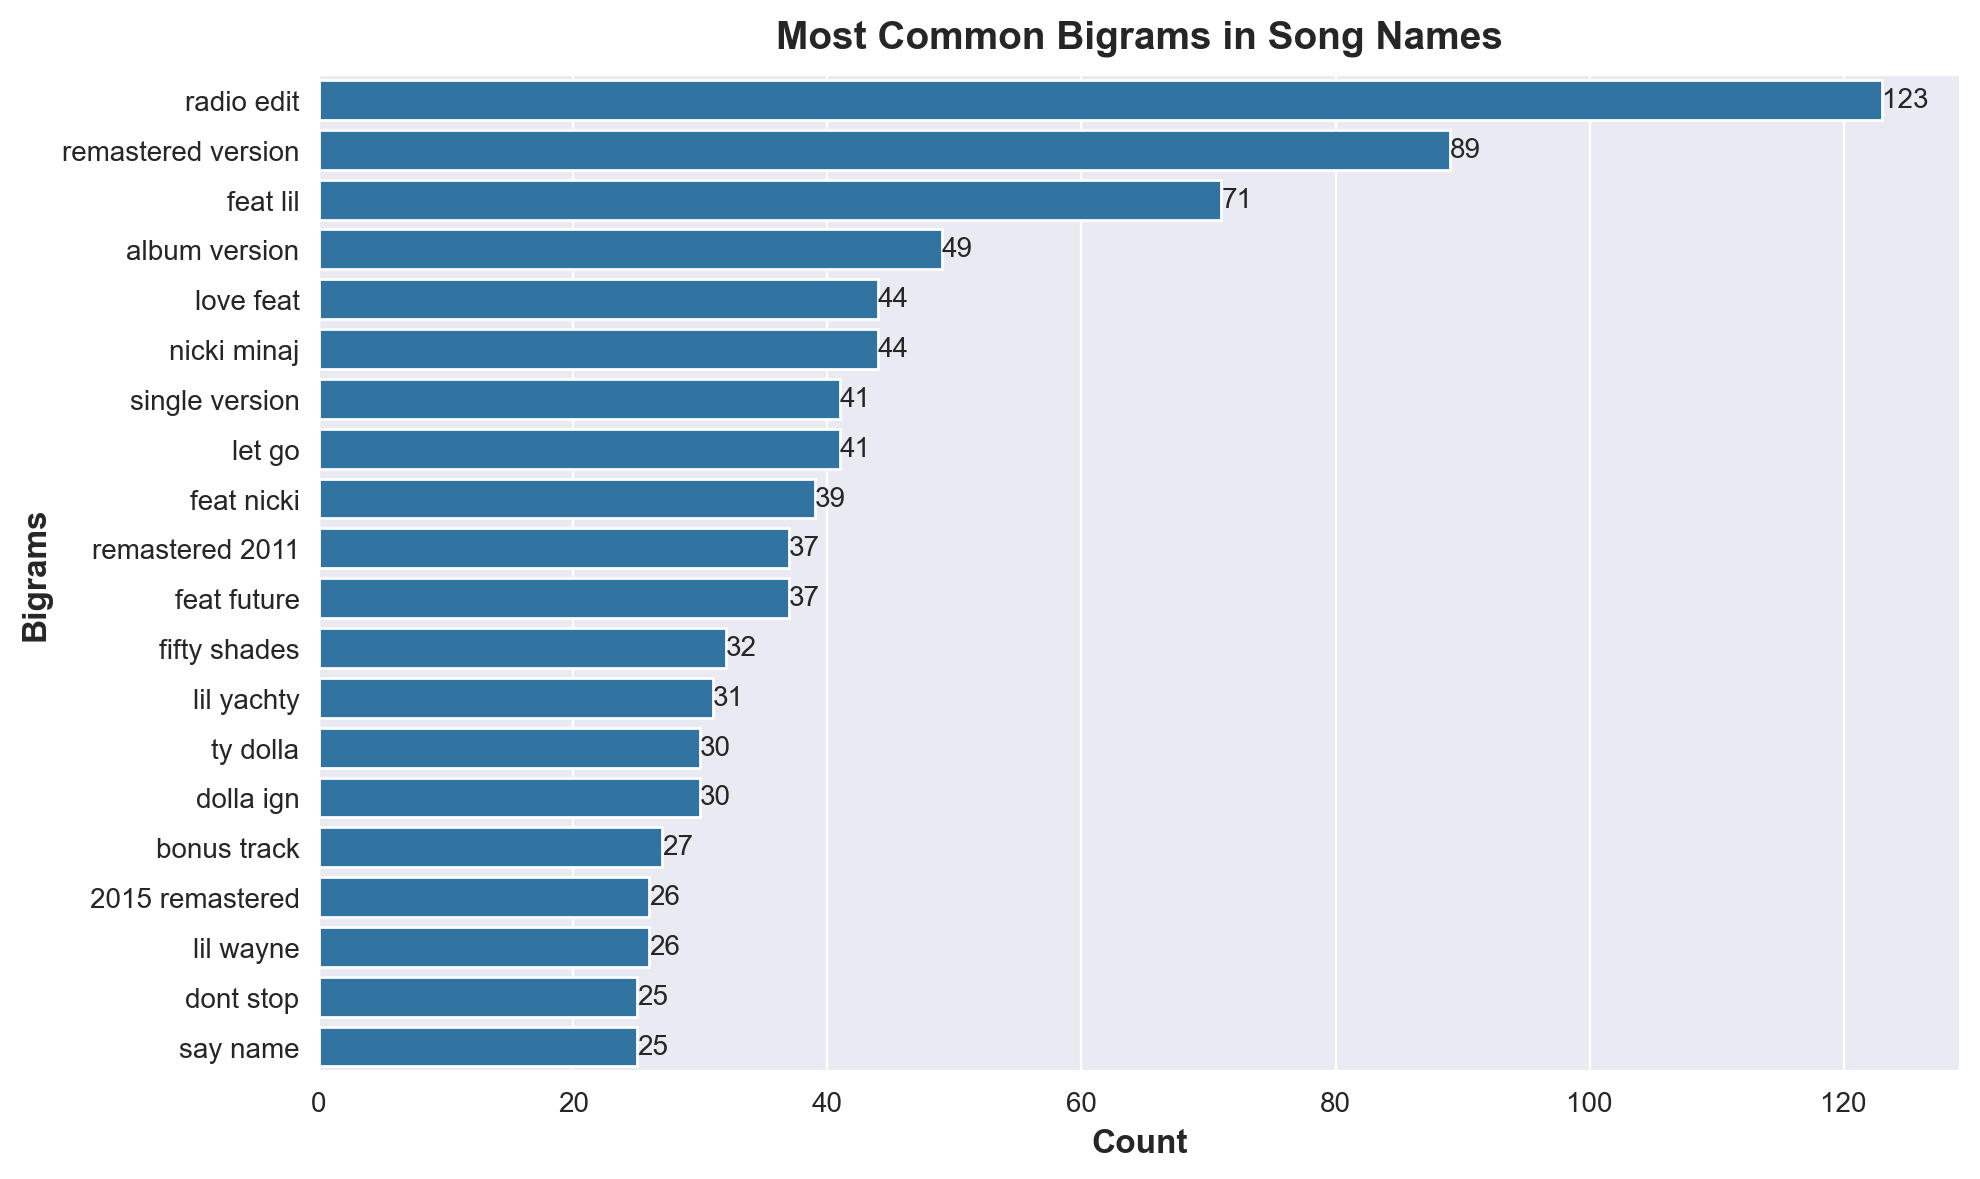

In [180]:
bigrams, counts = zip(*most_common_bigrams)
fig, ax = plt.subplots(figsize=(10, 6))
sns.barplot(x=list(counts), y=list(bigrams), ax = ax)
for container in ax.containers:
    ax.bar_label(container, fmt = "%.0f")
plt.title('Most Common Bigrams in Song Names')
plt.xlabel('Count')
plt.ylabel('Bigrams')
plt.show();

In [100]:
# Check for inconsistencies in 'age'
print(df['age'].unique())

# Assuming age should be between 10 and 100
df = df[(df['age'] >= 13) & (df['age'] <= 80)]

# Check for inconsistencies in 'country'
print(df['country'].unique())
# If necessary, standardize country names or handle special cases

# Verify and correct any other inconsistencies
# For instance, check if 'duration' is reasonablea
print(df['duration'].describe())
# Assuming duration should be between 0 and 20 minutes
df = df[(df['duration'] > 0) & (df['duration'] <= 20)]


[16 44 18 60 15 35 57 17 62 14 34 50 37 78 19 55 61 64 63 77 20 74 38 25
 41 80 49 32 31 13 52 68 27 29 51 76 58 66 39 24 22 21 70 45 46 43 36 59
 26 47 28 23 40 65 56 33 79 69 53 48 54 30 67 73 42 72 71 75]
[' Urban ' ' Non-Urban ']
count    14025.000000
mean         3.880570
std          0.929399
min          0.000000
25%          3.360000
50%          3.750000
75%          4.240000
max         20.080000
Name: duration, dtype: float64


In [103]:
# from pandas_profiling import ProfileReport

# df_ = pd.read_csv("../data/cleaned_data.csv")
# profile = ProfileReport(df_, title="Pandas Profiling Report")

# profile.to_notebook_iframe()

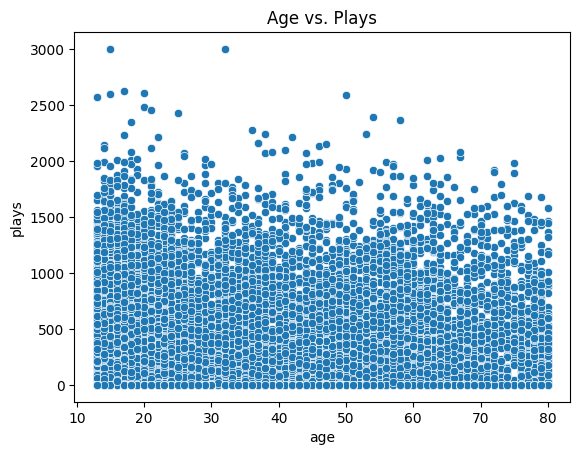

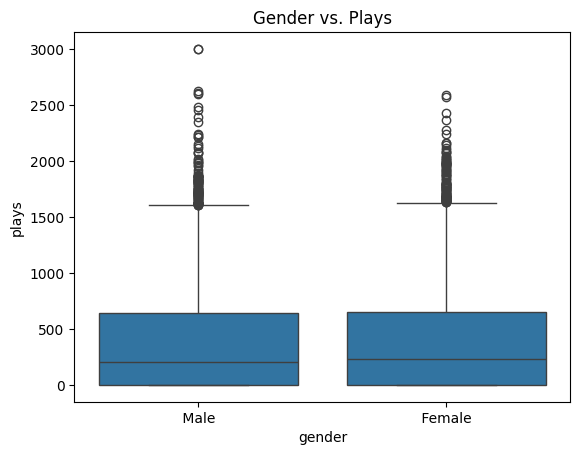

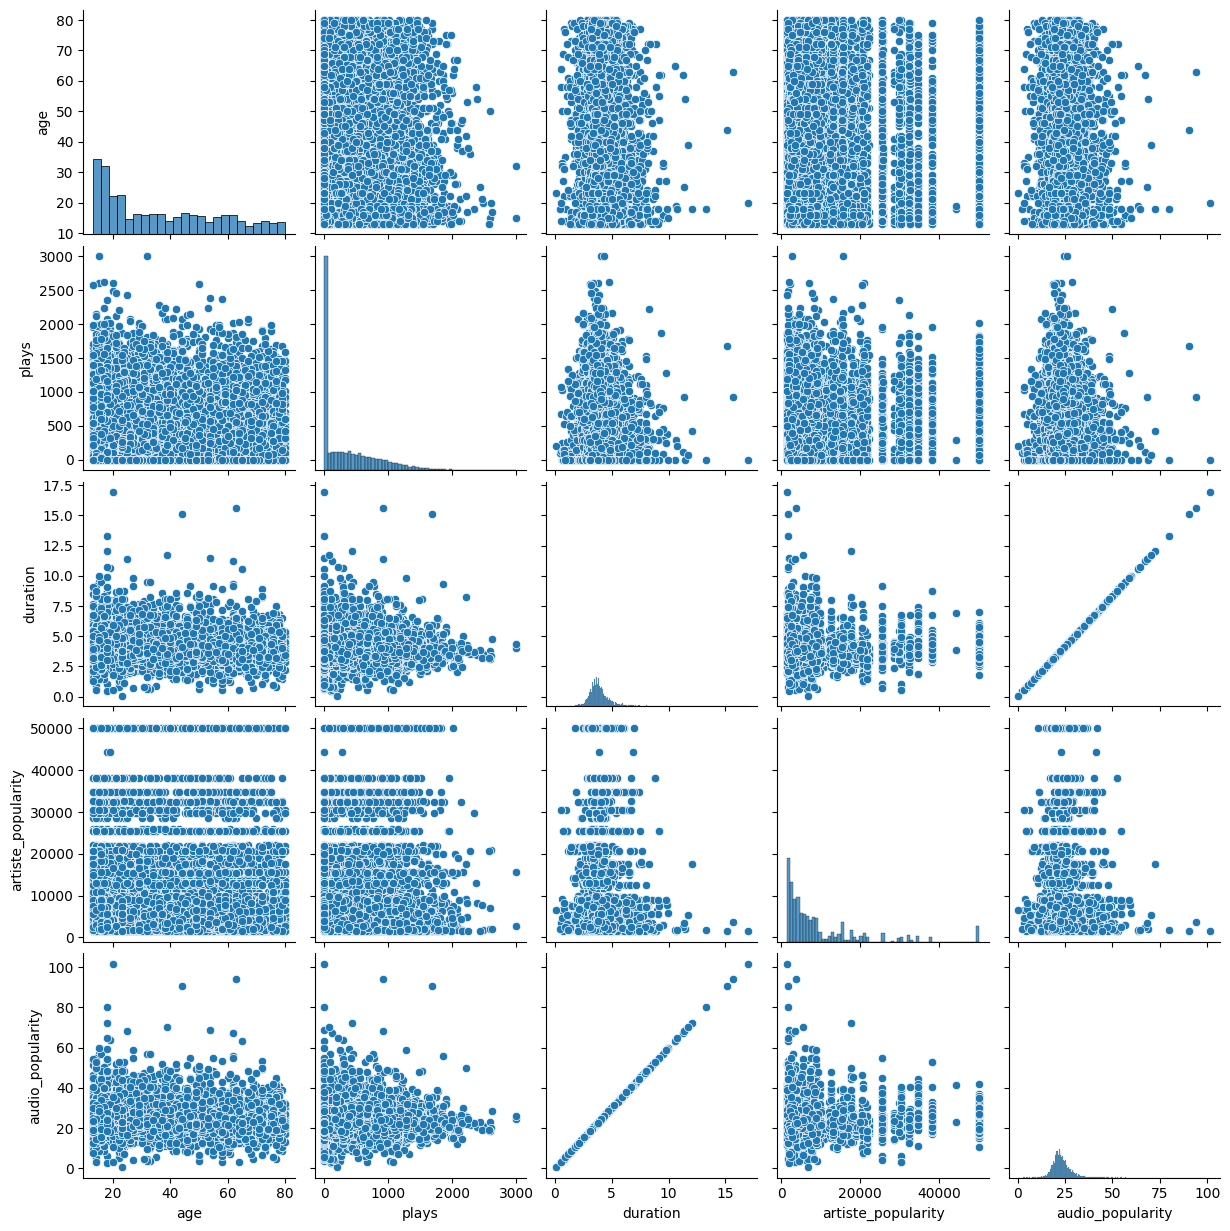

In [107]:
# Scatter plot of age vs. plays
sns.scatterplot(x='age', y='plays', data=df)
plt.title('Age vs. Plays')
plt.show()

# Box plot of gender vs. plays
sns.boxplot(x='gender', y='plays', data=df)
plt.title('Gender vs. Plays')
plt.show()

# Pair plot of key features
sns.pairplot(df[['age', 'plays', 'duration', 'artiste_popularity', 'audio_popularity']])
plt.show()


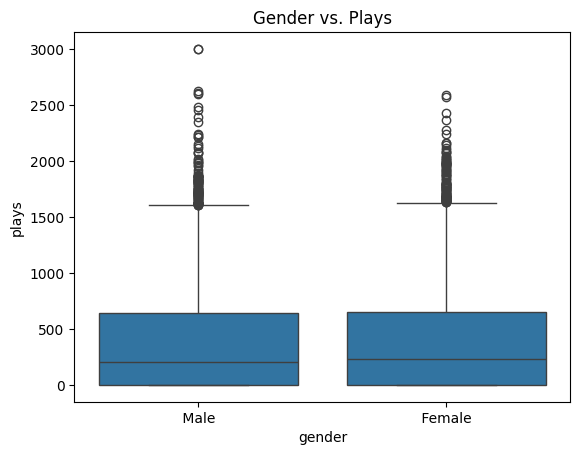

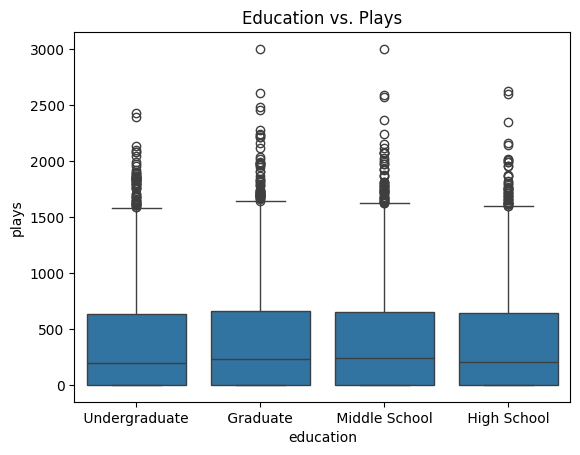

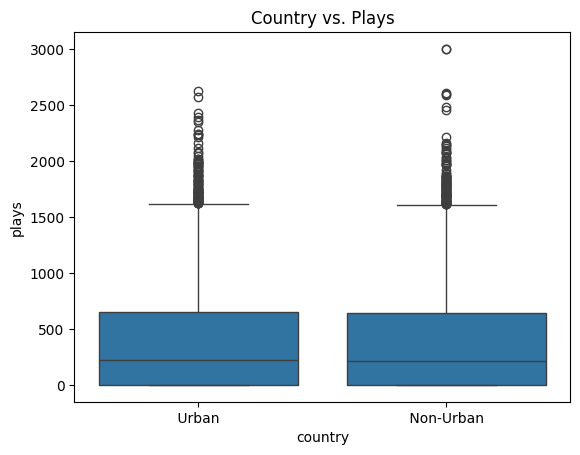

In [92]:
# Influence of demographic variables on music preferences
sns.boxplot(x='gender', y='plays', data=df)
plt.title('Gender vs. Plays')
plt.show()

sns.boxplot(x='education', y='plays', data=df)
plt.title('Education vs. Plays')
plt.show()

sns.boxplot(x='country', y='plays', data=df)
plt.title('Country vs. Plays')
plt.show()


In [94]:
# Select numeric columns only
df_numeric = df.select_dtypes(include=[np.number])

# Identify outliers using IQR method
Q1 = df_numeric.quantile(0.25)
Q3 = df_numeric.quantile(0.75)
IQR = Q3 - Q1

# Define outlier criteria
outliers = ((df_numeric < (Q1 - 1.5 * IQR)) | (df_numeric > (Q3 + 1.5 * IQR)))
print(outliers.sum())

# Remove outliers
df_no_outliers = df_numeric[~((df_numeric < (Q1 - 1.5 * IQR)) | (df_numeric > (Q3 + 1.5 * IQR))).any(axis=1)]

user_id                  0
age                      0
plays                  210
artiste_popularity    1118
audio_popularity       720
music_acousticness       0
danceability             0
energy                   0
key                      0
loudness                 0
mode                     0
speechiness              0
instrumentalness         0
liveness                 0
valence                  0
tempo                    0
time_signature           0
duration               718
followers                0
scaled_ratings           0
dtype: int64


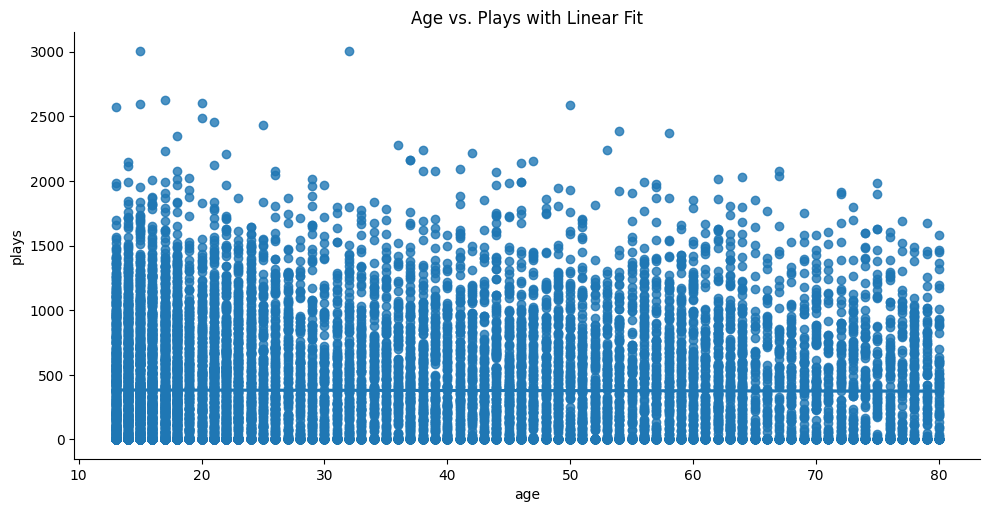

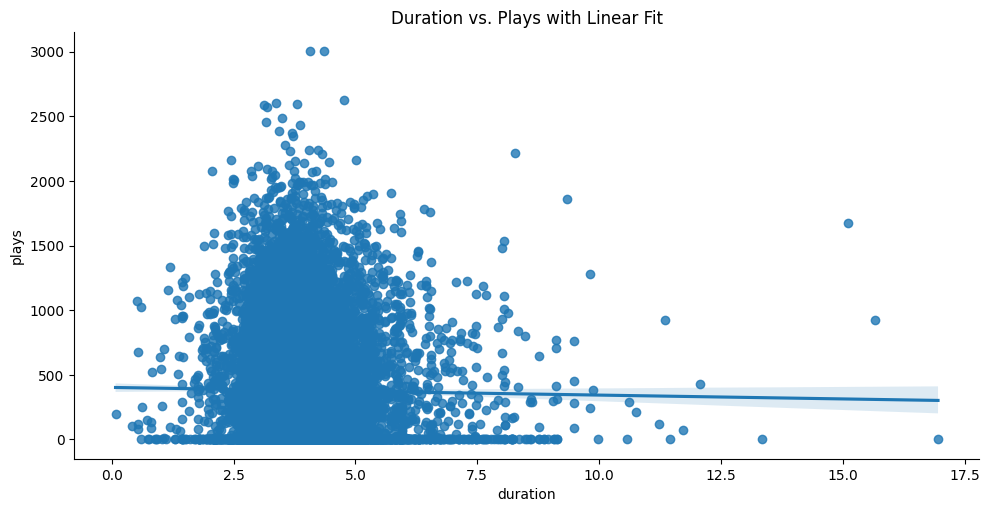

In [95]:
# Deeper analysis of relationships identified during visualization
# Example: Age and Plays
sns.lmplot(x='age', y='plays', data=df, aspect=2)
plt.title('Age vs. Plays with Linear Fit')
plt.show()

# Example: Duration and Plays
sns.lmplot(x='duration', y='plays', data=df, aspect=2)
plt.title('Duration vs. Plays with Linear Fit')
plt.show()


The two scatter plots you've generated provide some useful insights into the relationships between age, duration, and the number of plays in your dataset.

Image 1: Age vs. Plays with Linear Fit
This scatter plot shows the relationship between age and the number of plays. The data points are quite scattered, but there appears to be a general downward trend, suggesting that as age increases, the number of plays tends to decrease. However, the linear fit line indicates a relatively weak negative correlation, as there is still a lot of variability in the data points around the line.

Image 2: Duration vs. Plays with Linear Fit
This scatter plot shows the relationship between duration and the number of plays. Here, we can see a more distinct pattern. The data points form a somewhat triangular shape, with a dense cluster of points at the lower end of the duration range, and then a gradually decreasing number of points as the duration increases. The linear fit line suggests a positive correlation between duration and the number of plays, but the relationship appears to be non-linear, with the number of plays increasing more rapidly for shorter durations and then plateauing or increasing more slowly for longer durations.

Next steps:
1. Assess the strength and significance of the correlations: Calculate correlation coefficients (e.g., Pearson's r) and their associated p-values to determine the strength and statistical significance of the relationships between age, duration, and the number of plays.

2. Explore non-linear relationships: Since the scatter plot for duration vs. plays suggests a non-linear relationship, you might consider fitting a non-linear model (e.g., polynomial regression, logarithmic regression) to better capture the pattern in the data.

3. Investigate other potential predictors: Examine the relationships between the number of plays and other variables in your dataset, as there might be additional factors influencing the number of plays.

4. Perform regression analysis: Once you've identified the most relevant predictors, you can build a multiple regression model to quantify the impact of each predictor on the number of plays, while controlling for the other variables.

5. Validate and refine the model: Split your data into training and test sets, evaluate the performance of your model on the test set, and consider techniques like cross-validation and regularization to improve the model's generalization and prevent overfitting.

6. Interpret and communicate findings: Summarize the key insights from your analysis, including the strength and direction of the relationships between the predictors and the number of plays, and discuss the practical implications of your findings.


In [ ]:
def wrangle(filepath: str):
    date_cols = [col for col in df.columns if 'date' in col]
    PATH = os.getcwd()
    df = pd.read_csv(os.path.join(PATH, filepath))

    #convert columns to date format
    date_cols = [col for col in df.columns if 'date' in col]
    for col in date_cols:
        df[col] = pd.to_datetime(df[col], errors = 'coerce').dropna(axis = 0)
    #drop columns with high multicollineaarity
    df.drop(['audio_popularity', 'scaled_ratings'], axis = 1, inplace = True)
    #clean artist names
    clean_artist_name = lambda name: re.sub(r'[$]', 'S', name)
    
    df['artist_name'] = df['artist_name'].apply(clean_artist_name)

    #drop non-relevant columns
    df.drop(['music_id', 'id_artists'], axis = 1, inplace = True)


    return df